In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("HR-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1 Exploratory Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 1.1 Removing Columns

In [4]:
# make copy of df
df_1 = df.copy()

# check and drop low variability columns
low_var_col = []
unique_count = 1

for col in df_1:
    if df_1[col].nunique() <= unique_count:
        low_var_col.append(col)

print("The columns to be dropped are", low_var_col, "which equates to", str(len(low_var_col)), "columns")

df_1.drop(columns = low_var_col, inplace = True)

print(str(df.shape), "has been changed to", str(df_1.shape))

The columns to be dropped are ['EmployeeCount', 'Over18', 'StandardHours'] which equates to 3 columns
(1470, 35) has been changed to (1470, 32)


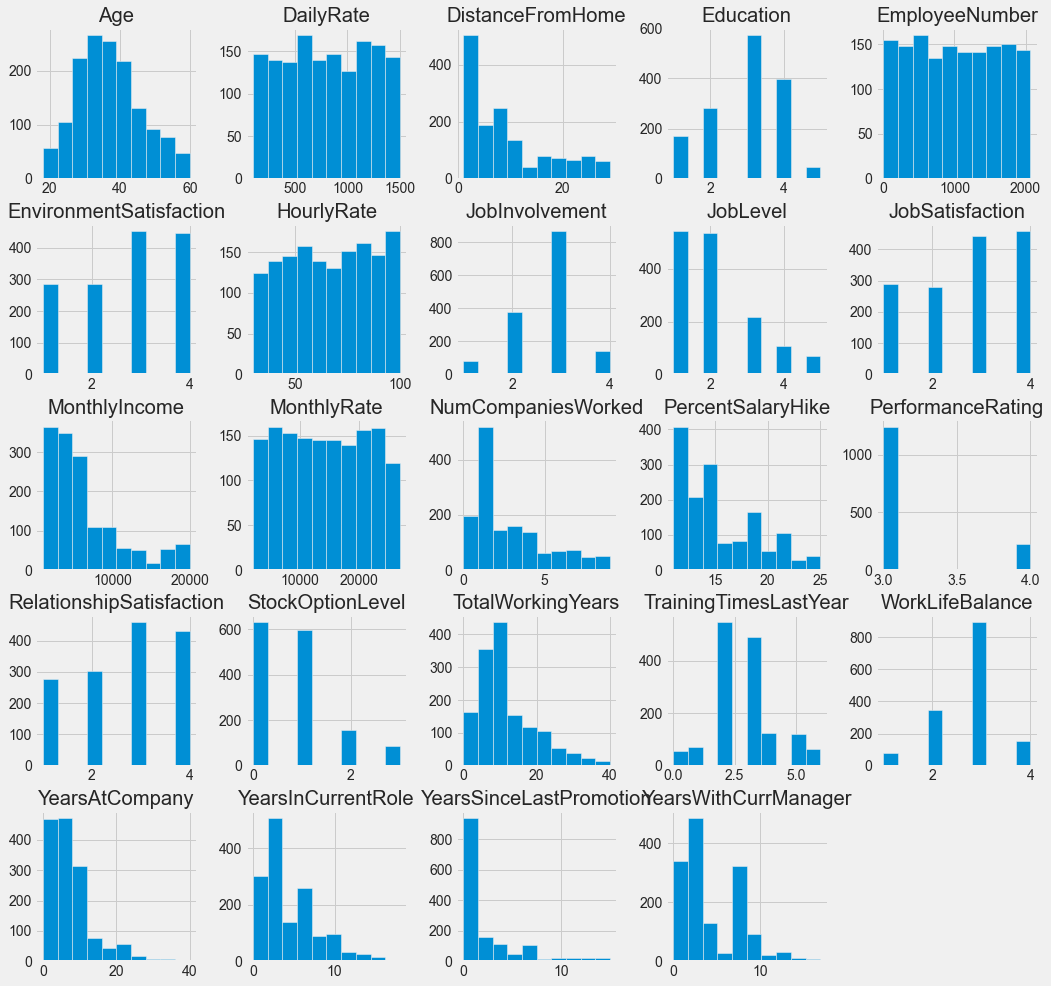

In [5]:
# also contains numeric discrete features here
df_1.hist(figsize = (16, 16))
plt.show()

In [6]:
df_1.drop(columns = "PerformanceRating", inplace = True)
print(str(df.shape), "has been changed to", str(df_1.shape))

(1470, 35) has been changed to (1470, 31)


In [7]:
# does not tell us anything
print(df_1["EmployeeNumber"].nunique())

df_1.drop(columns = "EmployeeNumber", inplace = True)
print(str(df.shape), "has been changed to", str(df_1.shape))

1470
(1470, 35) has been changed to (1470, 30)


In [8]:
df_1.drop(columns = ["DailyRate", "HourlyRate", "MonthlyRate"], inplace = True)
print(str(df.shape), "has been changed to", str(df_1.shape))

(1470, 35) has been changed to (1470, 27)


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

# 1.2 Analyzing Features

In [10]:
# analyze categorical features
object_col = []

for column in df_1.columns:
    if df_1[column].dtype == object and len(df_1[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df_1[column].unique()}")
        print(df_1[column].value_counts())
        print("====================================")
        
object_col.remove("Attrition")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()
df_1["Attrition"] = label.fit_transform(df_1.Attrition)

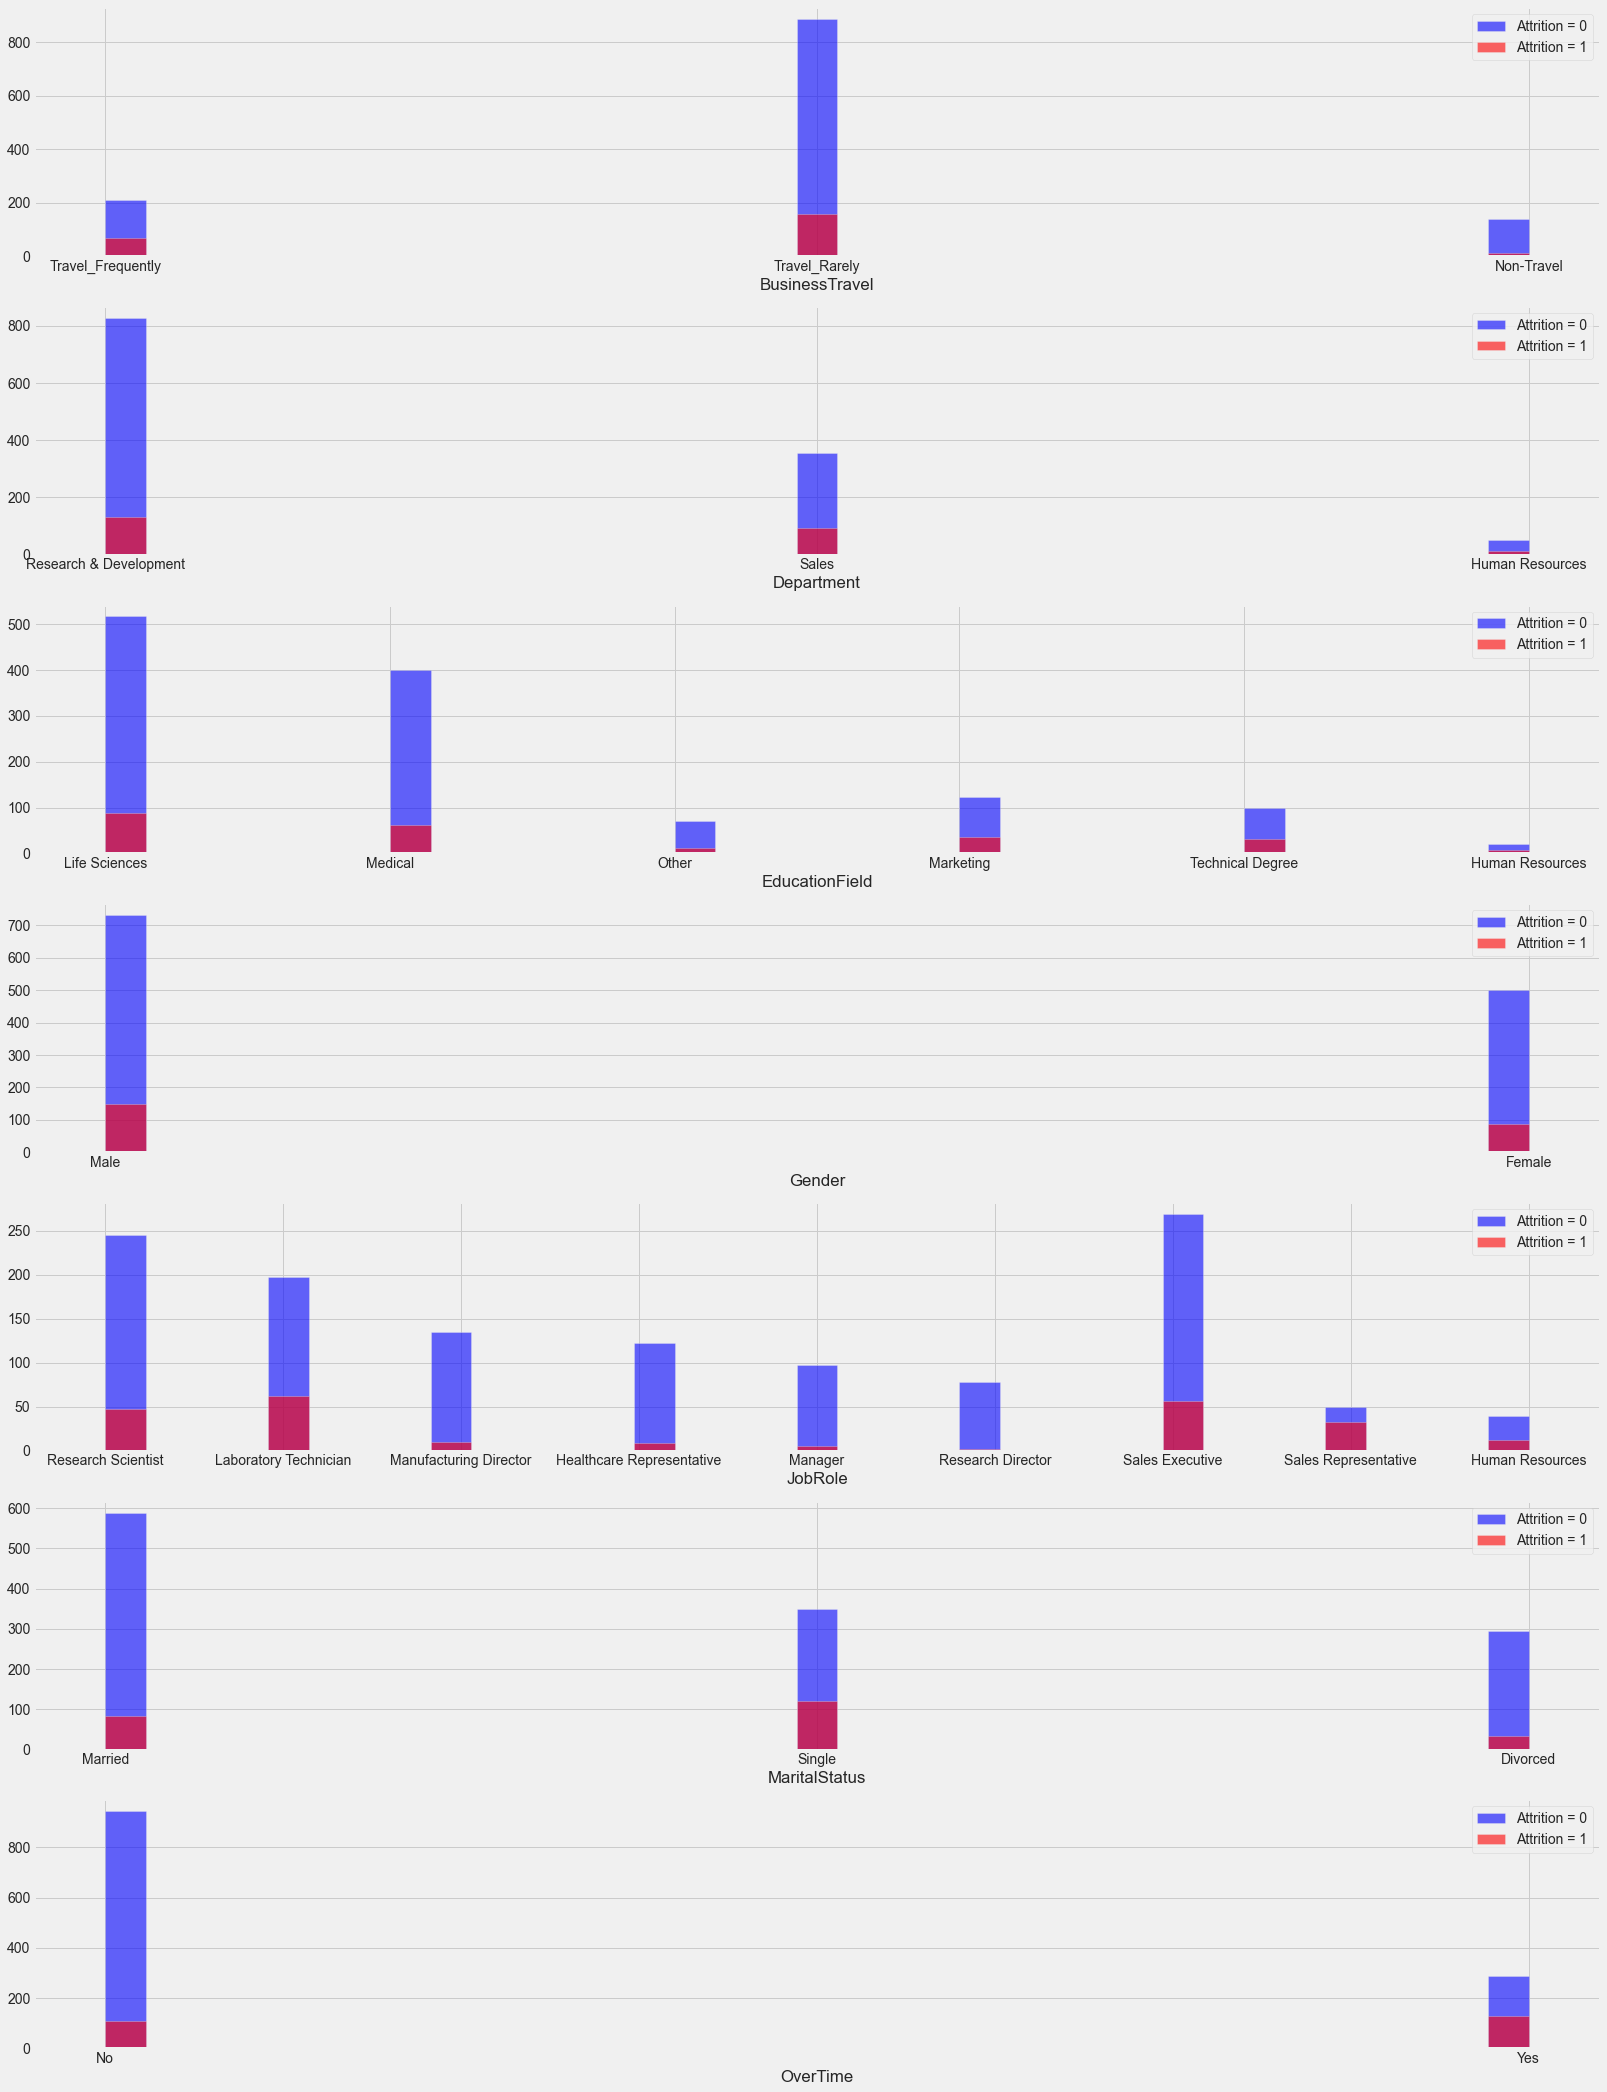

In [13]:
plt.figure(figsize = (25, 35))

for i, column in enumerate(object_col, 1):
    plt.subplot(7, 1, i)
    df_1[df_1["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "Attrition = 0", alpha = 0.6)
    df_1[df_1["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Attrition = 1", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

In [14]:
discrete_col = []

for column in df_1.columns:
    if df_1[column].dtypes != object and df_1[column].nunique() < 30:
        print(f"{column} : {df_1[column].unique()}")
        discrete_col.append(column)
        print("====================================")
        
discrete_col.remove("Attrition")

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

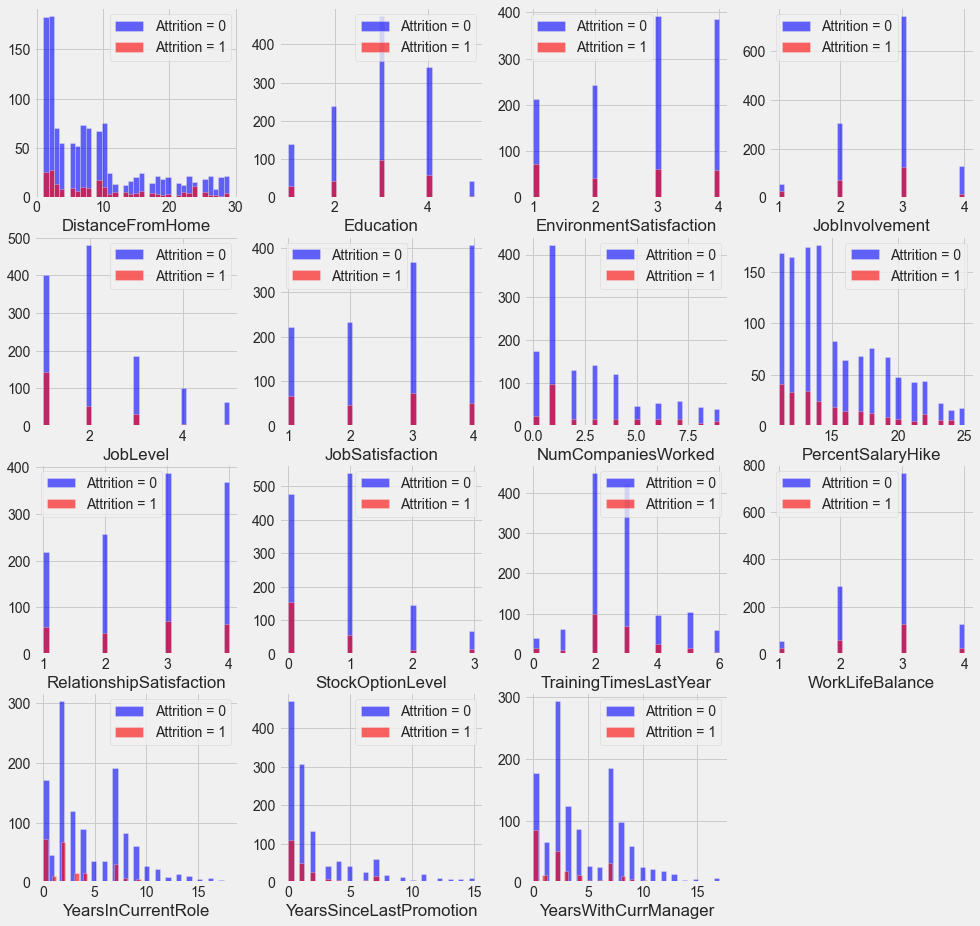

In [16]:
plt.figure(figsize = (15, 15))

for i, column in enumerate(discrete_col, 1):
    plt.subplot(4, 4, i)
    df_1[df_1["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "Attrition = 0", alpha = 0.6)
    df_1[df_1["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Attrition = 1", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

In [17]:
cont_col = []

for column in df_1.columns:
    if df_1[column].dtypes != object and df_1[column].nunique() > 30:
        print(f"{column} : Minimum: {df_1[column].min()}, Maximum: {df_1[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
MonthlyIncome : Minimum: 1009, Maximum: 19999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


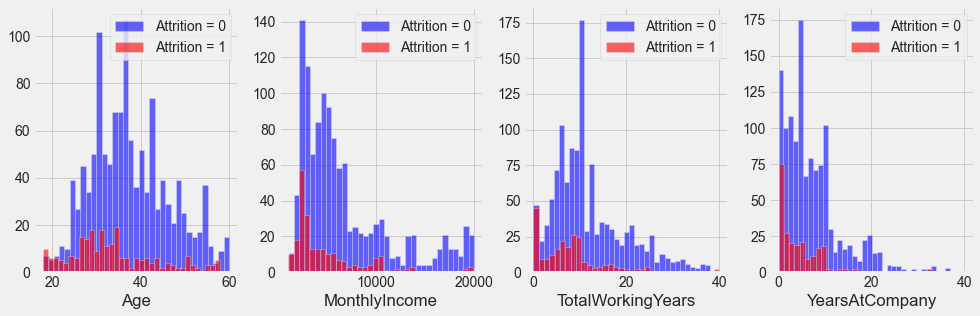

In [18]:
plt.figure(figsize = (15, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df_1[df_1["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "Attrition = 0", alpha = 0.6)
    df_1[df_1["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Attrition = 1", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

# 1.2 Checking for Correlation

<AxesSubplot:>

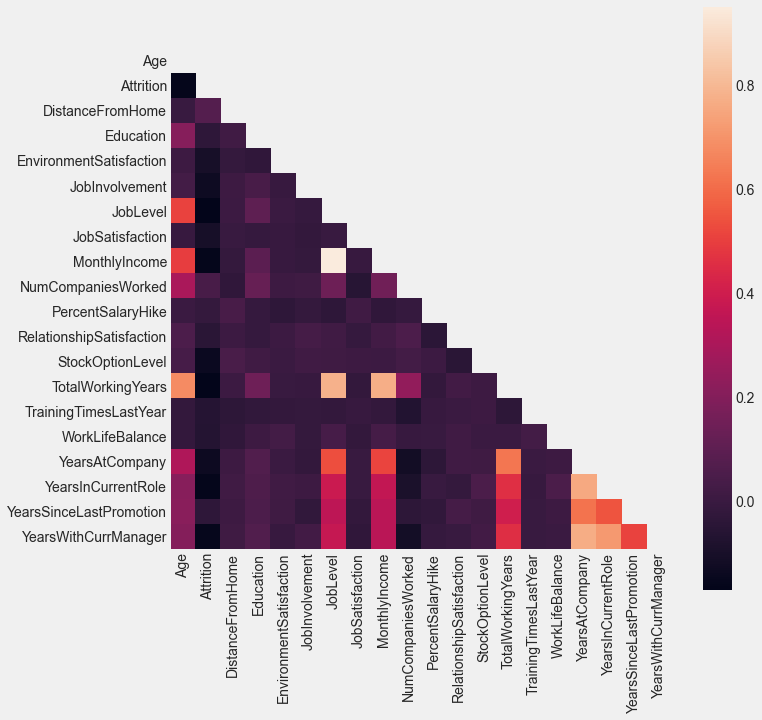

In [19]:
correlation = df_1.corr()
mask = np.zeros_like(correlation)

# get lower triangle of matrix
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10, 10))
sns.heatmap(correlation, mask = mask, square = True)

# 2 More Data Preprocessing

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# 2.1 Feature Encoding

Attribute was previously label encoded in code above. So we don't double encode.

In [21]:
# convert categorical variables with > 2 unique values into dummies
df_1 = pd.get_dummies(df_1, columns = ['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],
                   drop_first = True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   int32 
 2   BusinessTravel                     1470 non-null   object
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EnvironmentSatisfaction            1470 non-null   int64 
 6   JobInvolvement                     1470 non-null   int64 
 7   JobLevel                           1470 non-null   int64 
 8   JobSatisfaction                    1470 non-null   int64 
 9   MonthlyIncome                      1470 non-null   int64 
 10  NumCompaniesWorked                 1470 non-null   int64 
 11  PercentSalaryHike                  1470 non-null   int64 
 12  Relati

In [22]:
ordinal_enc = OrdinalEncoder(categories = [['Non-Travel',
                                'Travel_Rarely',
                                'Travel_Frequently']]
               )
df_1[['BusinessTravel']] = ordinal_enc.fit_transform(df_1[['BusinessTravel']])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int32  
 2   BusinessTravel                     1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   int64  
 10  NumCompaniesWorked                 1470 non-null   int64  
 11  PercentSalaryHike                  1470 non-null   int64

# 2.2 Feature Scaling

In [23]:
df_1.select_dtypes(include=['int64']).columns.tolist()

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_cols = df_1.select_dtypes(include=['int64']).columns.tolist()

for i in ['Education', 'EnvironmentSatisfaction','JobInvolvement', 
          'JobSatisfaction','RelationshipSatisfaction', 
          'WorkLifeBalance', 'JobLevel',
         'StockOptionLevel']:
    numerical_cols.remove(i)

ct = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols)
    ], remainder='passthrough')

df_1[numerical_cols] = ct.fit_transform(df_1[numerical_cols])

In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int32  
 2   BusinessTravel                     1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   float64
 10  NumCompaniesWorked                 1470 non-null   float64
 11  PercentSalaryHike                  1470 non-null   float

In [26]:
X = df_1.drop(['Attrition'], axis=1)
y = df_1["Attrition"]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   BusinessTravel                     1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   JobInvolvement                     1470 non-null   int64  
 6   JobLevel                           1470 non-null   int64  
 7   JobSatisfaction                    1470 non-null   int64  
 8   MonthlyIncome                      1470 non-null   float64
 9   NumCompaniesWorked                 1470 non-null   float64
 10  PercentSalaryHike                  1470 non-null   float64
 11  RelationshipSatisfaction           1470 non-null   int64

In [27]:
df_1

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,1,1.0,-1.010909,2,2,3,2,4,-0.108350,...,0,0,0,0,0,1,0,0,1,1
1,1.322365,0,2.0,-0.147150,1,3,2,2,2,-0.291719,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1,1.0,-0.887515,2,4,2,1,3,-0.937654,...,1,0,0,0,0,0,0,0,1,1
3,-0.429664,0,2.0,-0.764121,4,4,3,1,3,-0.763634,...,0,0,0,0,1,0,0,1,0,1
4,-1.086676,0,1.0,-0.887515,1,1,3,1,2,-0.644858,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,2.0,1.703764,2,3,4,2,4,-0.835451,...,1,0,0,0,0,0,0,1,0,0
1466,0.227347,0,1.0,-0.393938,1,4,2,3,1,0.741140,...,0,0,0,0,0,0,0,1,0,0
1467,-1.086676,0,1.0,-0.640727,3,2,4,2,2,-0.076690,...,0,0,1,0,0,0,0,1,0,1
1468,1.322365,0,2.0,-0.887515,3,4,2,2,2,-0.236474,...,0,0,0,0,0,1,0,1,0,0


# 2.3 Split into Train-Validation, Test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# random_state = 42 always gets us the same output as the first split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.15, 
                                                            stratify=y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.15, 
                                                  stratify = y_train_val, random_state = 42)

# 3 Models

Imbalance in data set to be handled in Cross-Validation process to prevent data leakage of validation set during split during
Cross-Validation. 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score,classification_report, roc_curve, auc, roc_auc_score, recall_score 
from sklearn.model_selection import cross_val_score, GridSearchCV

# 3.1 Handling the Imbalanced Dataset

Only kept for placeholder. 

In [31]:
# from imblearn.over_sampling import SMOTE

In [32]:
# oversampler = SMOTE(random_state = 42)
# X_train_smote, y_train_smote = oversampler.fit_sample(X_train, y_train)

# 3.2 Building Model 1: Random Forest


Select model via performance on validation set.

In [33]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
pipe_rf = Pipeline([
         ('sampling', SMOTE(random_state = 42)),
         ('clf', RandomForestClassifier(criterion='gini', random_state = 42,n_jobs = -1))
     ])



In [35]:
params = {'clf__max_depth': [1,10,25,50,100,1000] , # gloria: i propose trying [5, 10, 15, 20, 25] #tried before
          'clf__min_samples_leaf': [1,2,4,6,8,12]  ,     
          'clf__max_features': [2,4,7,10,12] ,  
          'clf__n_estimators': [100,300,500,700,800,1000] # gloria: i propose trying [100, 200, 300, 400, 500] # tried before
             }
rf_grid = GridSearchCV(pipe_rf, 
                    params,
                    scoring='roc_auc', 
                    cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                                       ('clf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'clf__max_depth': [1, 10, 50, 100, 1000],
                         'clf__max_features': [2, 4, 7, 10, 12],
                         'clf__min_samples_leaf': [1, 2, 4, 6, 8, 12],
                         'clf__n_estimators': [100, 300, 500, 700, 800, 1000]},
             scoring='roc_auc')

In [36]:
print(rf_grid.best_params_)
print(rf_grid.score(X_train, y_train))

{'clf__max_depth': 50, 'clf__max_features': 2, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 1000}
1.0


{'clf__max_depth': 50, 'clf__max_features': 2, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 1000}

ROC_AUC:  0.7917721518987342
Recall:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       158
           1       0.38      0.67      0.49        30

    accuracy                           0.78       188
   macro avg       0.66      0.73      0.67       188
weighted avg       0.84      0.78      0.80       188



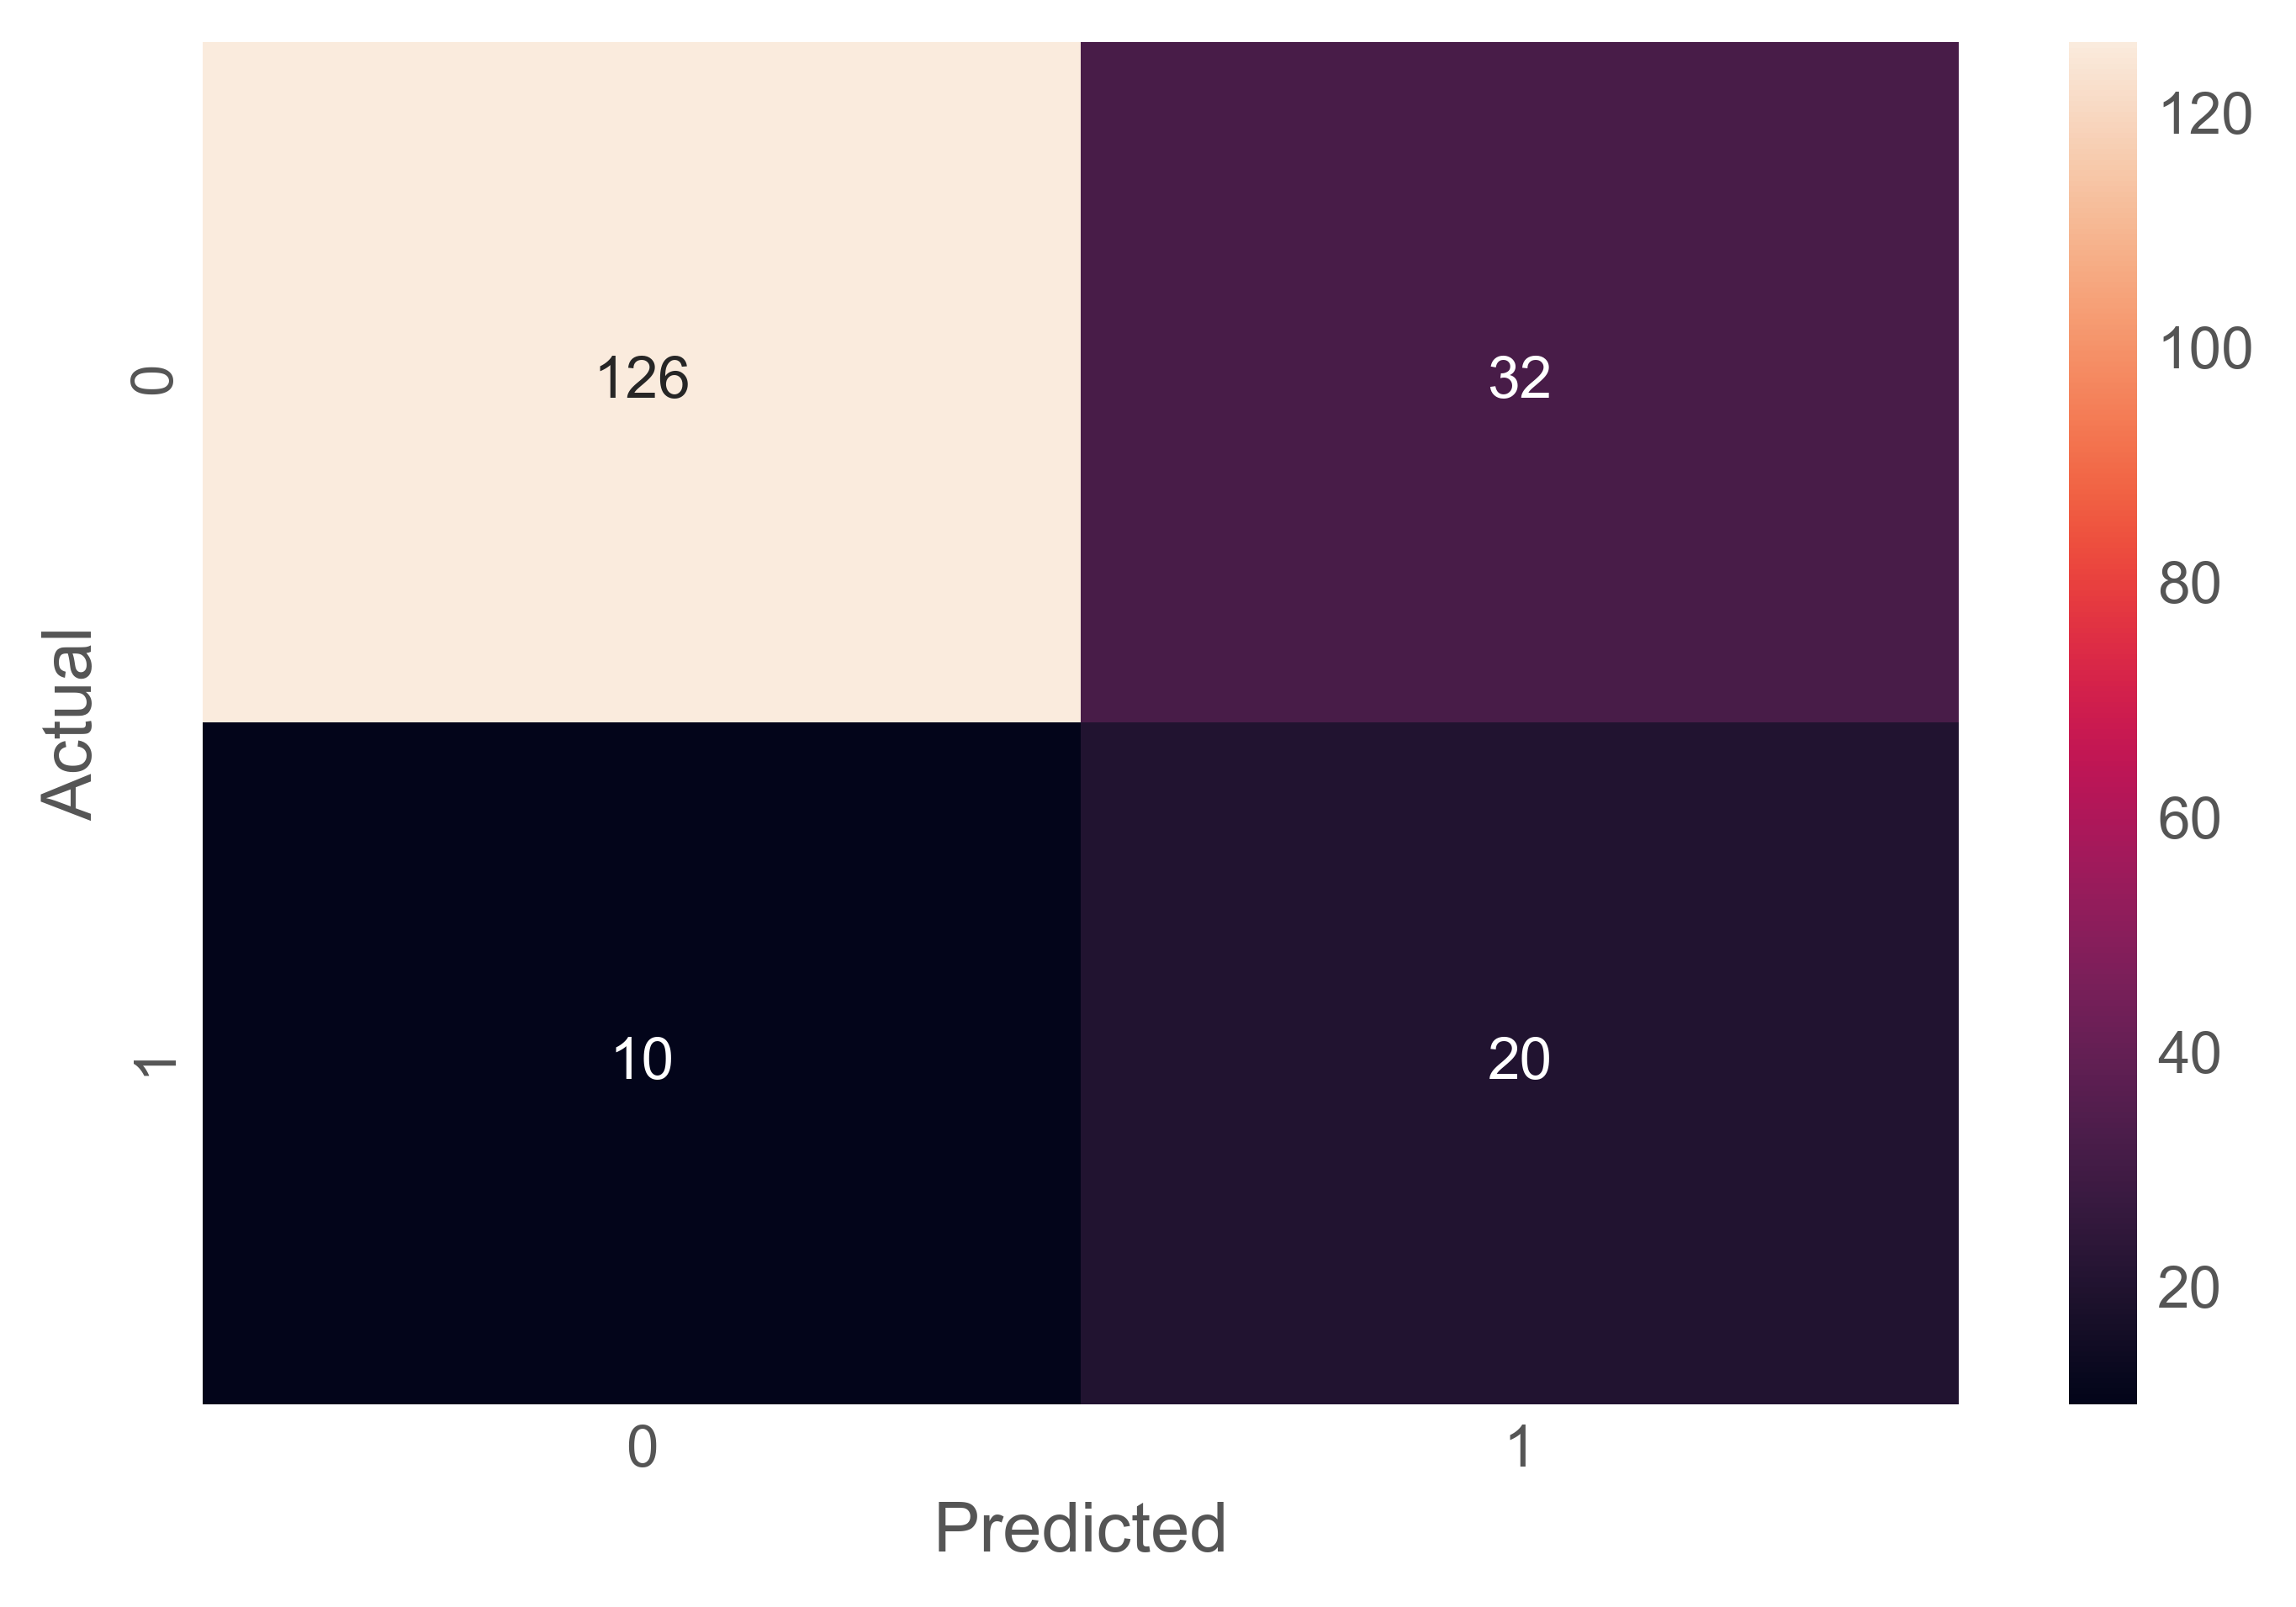

In [59]:
RandomForestCLF = RandomForestClassifier(criterion='gini', 
                                         n_estimators = 1000, 
                                         max_features=2, 
                                         max_depth = 50,
                                         min_samples_leaf= 1,
                                        n_jobs = -1)
RandomForestCLF.fit(X_train, y_train)
y_pred_probrf = RandomForestCLF.predict_proba(X_val)[:, 1]
probabilitythreshold_rf = 0.2
y_pred_thresholdrf = (y_pred_probrf>=probabilitythreshold_rf).astype(int)

confusion_matrix_rf = pd.crosstab(y_val, y_pred_thresholdrf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g')

print('ROC_AUC: ',roc_auc_score(y_val, y_pred_probrf))
print('Recall: ', recall_score(y_val,y_pred_thresholdrf))
print(classification_report(y_val, y_pred_thresholdrf))

### Features Importance

In [60]:
feature_imp_rf = pd.Series(RandomForestCLF.feature_importances_,index=X.columns.values).sort_values(ascending=False)
feature_imp_rf

MonthlyIncome                        0.072375
Age                                  0.066802
TotalWorkingYears                    0.059198
DistanceFromHome                     0.051476
YearsAtCompany                       0.050168
PercentSalaryHike                    0.044592
YearsWithCurrManager                 0.042318
YearsInCurrentRole                   0.038382
NumCompaniesWorked                   0.037572
OverTime_Yes                         0.037544
WorkLifeBalance                      0.036523
EnvironmentSatisfaction              0.033112
TrainingTimesLastYear                0.032717
JobSatisfaction                      0.032520
RelationshipSatisfaction             0.031680
YearsSinceLastPromotion              0.030796
JobInvolvement                       0.030537
Education                            0.028645
StockOptionLevel                     0.028541
JobLevel                             0.026725
BusinessTravel                       0.021641
MaritalStatus_Single              

In [61]:
feature_imp_rf_df = pd.DataFrame(feature_imp_rf, index = None)
feature_imp_rf_df['Features'] = feature_imp_rf_df.index
feature_imp_rf_df = feature_imp_rf_df.rename(columns={0: "Importance"})

In [62]:
fig, ax1 = plt.subplots(figsize=(20,20))
plt.xticks(rotation=90)
plt.title('Importance of Features')
sns.barplot(x = 'Features', y = 'Importance',
            data = feature_imp_rf_df, 
            ax= ax1)
plt.show()

### AUC-ROC

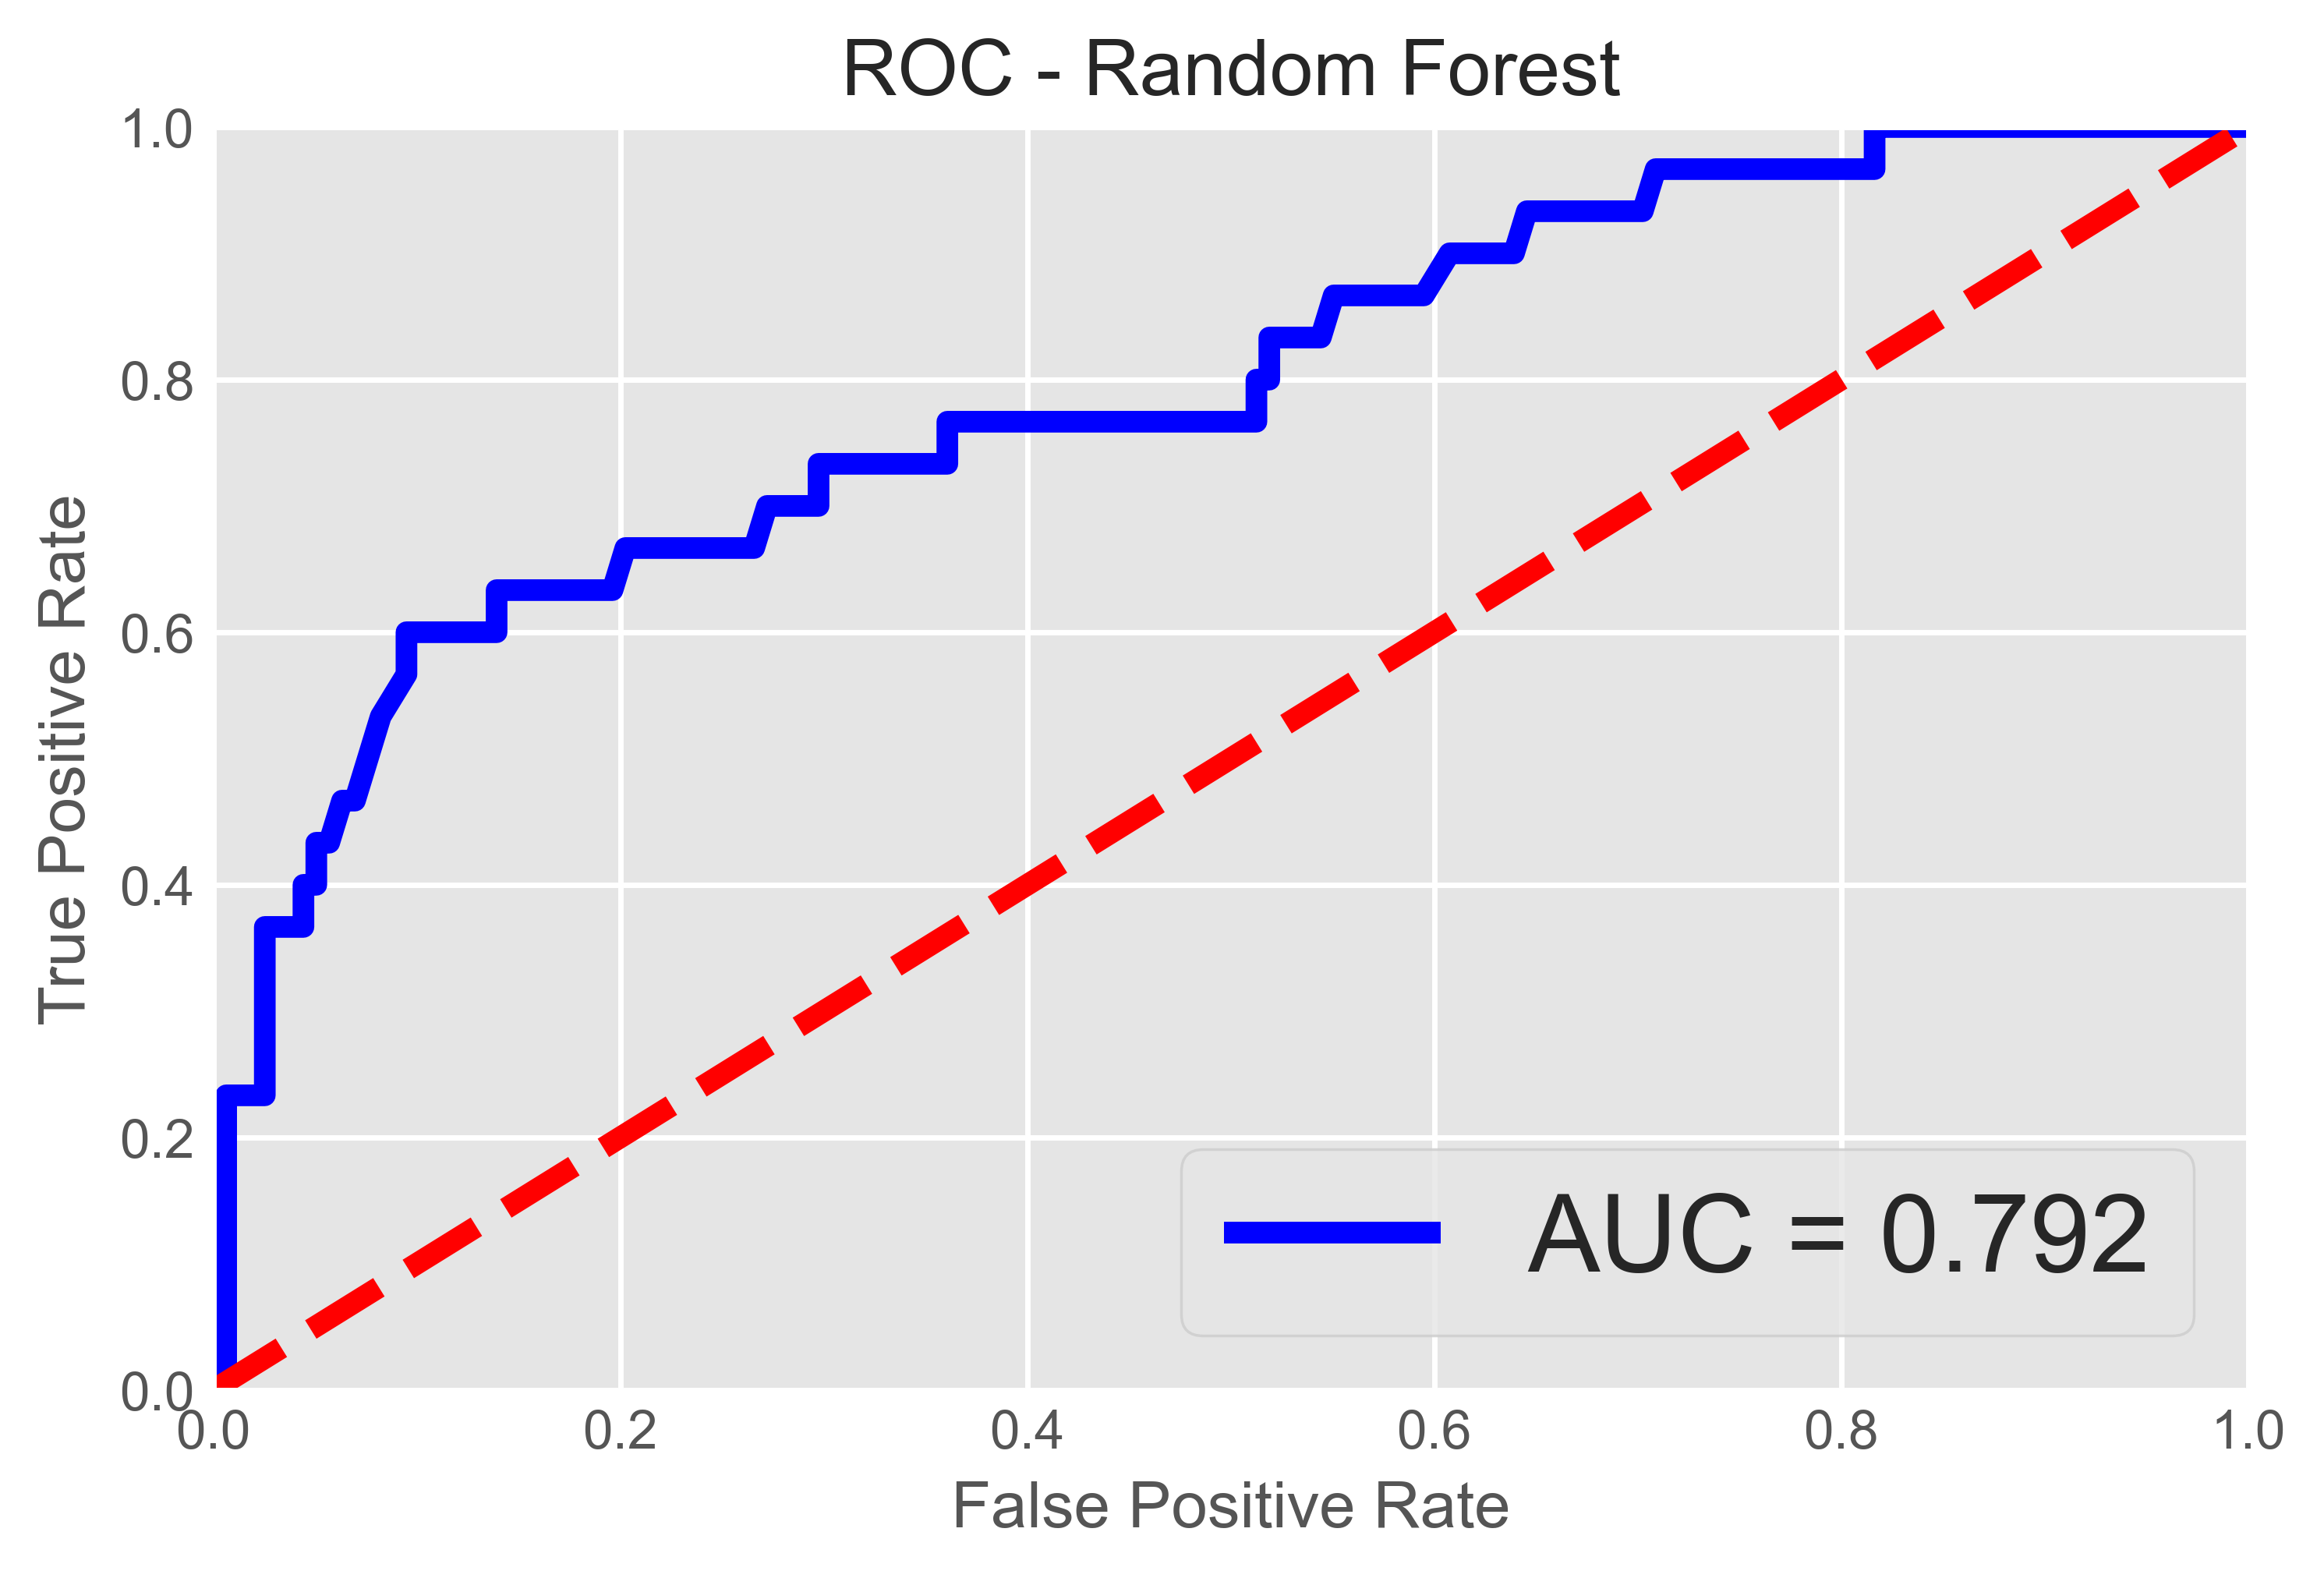

<Figure size 5000x5000 with 0 Axes>

In [64]:
fpr, tpr, threshold = roc_curve(y_val, y_pred_probrf)
roc_auc = auc(fpr, tpr)
auc_rf = roc_auc_score(y_val, y_pred_probrf)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC - Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 500
plt.style.use('ggplot')
plt.show()

# 3.3 Building Model 2: LightGBM

In [34]:
import imblearn
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
import lightgbm as lgb

In [66]:
#Initialize pipeline components
sampler = SMOTE(random_state=42)
classifier = lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)

rs_parameters = {
    'lgbmclassifier__learning_rate': [0.1, 0.15, 0.2, 0.25, 0.5],
    'lgbmclassifier__n_estimators': [800, 1000, 1050, 1100, 1200],
    'lgbmclassifier__num_leaves': [2,3,4,5,6],
    'lgbmclassifier__colsample_bytree' : [0.1,0.3,0.5,0.7,0.9]
    }
lgb_pipeline = make_pipeline(sampler, classifier)
grid_lgb = GridSearchCV(lgb_pipeline,
                         param_grid=rs_parameters,
                         cv=5,
                         scoring='roc_auc',
                         return_train_score=True,
                         n_jobs=-1
                        )
grid_lgb.fit(X_train, y_train)
grid_lgb.best_params_

{'lgbmclassifier__colsample_bytree': 0.1,
 'lgbmclassifier__learning_rate': 0.15,
 'lgbmclassifier__n_estimators': 1000,
 'lgbmclassifier__num_leaves': 2}

In [67]:
bestimator = grid_lgb.best_estimator_
print(bestimator)
print(grid_lgb.best_params_)
ypred = bestimator.predict(X_val)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.1, learning_rate=0.15,
                                n_estimators=1000, num_leaves=2,
                                objective='binary', random_state=42))])
{'lgbmclassifier__colsample_bytree': 0.1, 'lgbmclassifier__learning_rate': 0.15, 'lgbmclassifier__n_estimators': 1000, 'lgbmclassifier__num_leaves': 2}


ROC_AUC:  0.8639240506329114
Recall:  0.7333333333333333
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       158
           1       0.42      0.73      0.54        30

    accuracy                           0.80       188
   macro avg       0.68      0.77      0.70       188
weighted avg       0.86      0.80      0.82       188



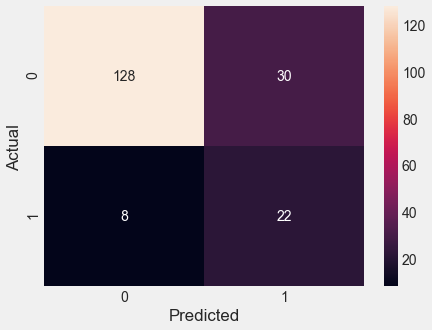

In [35]:
lgbmCLF = lgb.LGBMClassifier(learning_rate=0.15, 
                             n_estimators=1000,
                             num_leaves=2, 
                             colsample_bytree = 0.1,
                             objective='binary')

lgbmCLF.fit(X_train, y_train)
y_pred_problgbm = lgbmCLF.predict_proba(X_val)[:, 1]
probabilitythreshold_lgbm = 0.2
y_pred_thresholdlgbm = (y_pred_problgbm>=probabilitythreshold_lgbm).astype(int)

confusion_matrix_lgbm = pd.crosstab(y_val, y_pred_thresholdlgbm, rownames=['Actual'], colnames=['Predicted'])
fig, ax2 = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(confusion_matrix_lgbm, annot=True, fmt='g', ax = ax2)

print('ROC_AUC: ',roc_auc_score(y_val, y_pred_problgbm))
print('Recall: ', recall_score(y_val,y_pred_thresholdlgbm))
print(classification_report(y_val, y_pred_thresholdlgbm))

### AUC-ROC

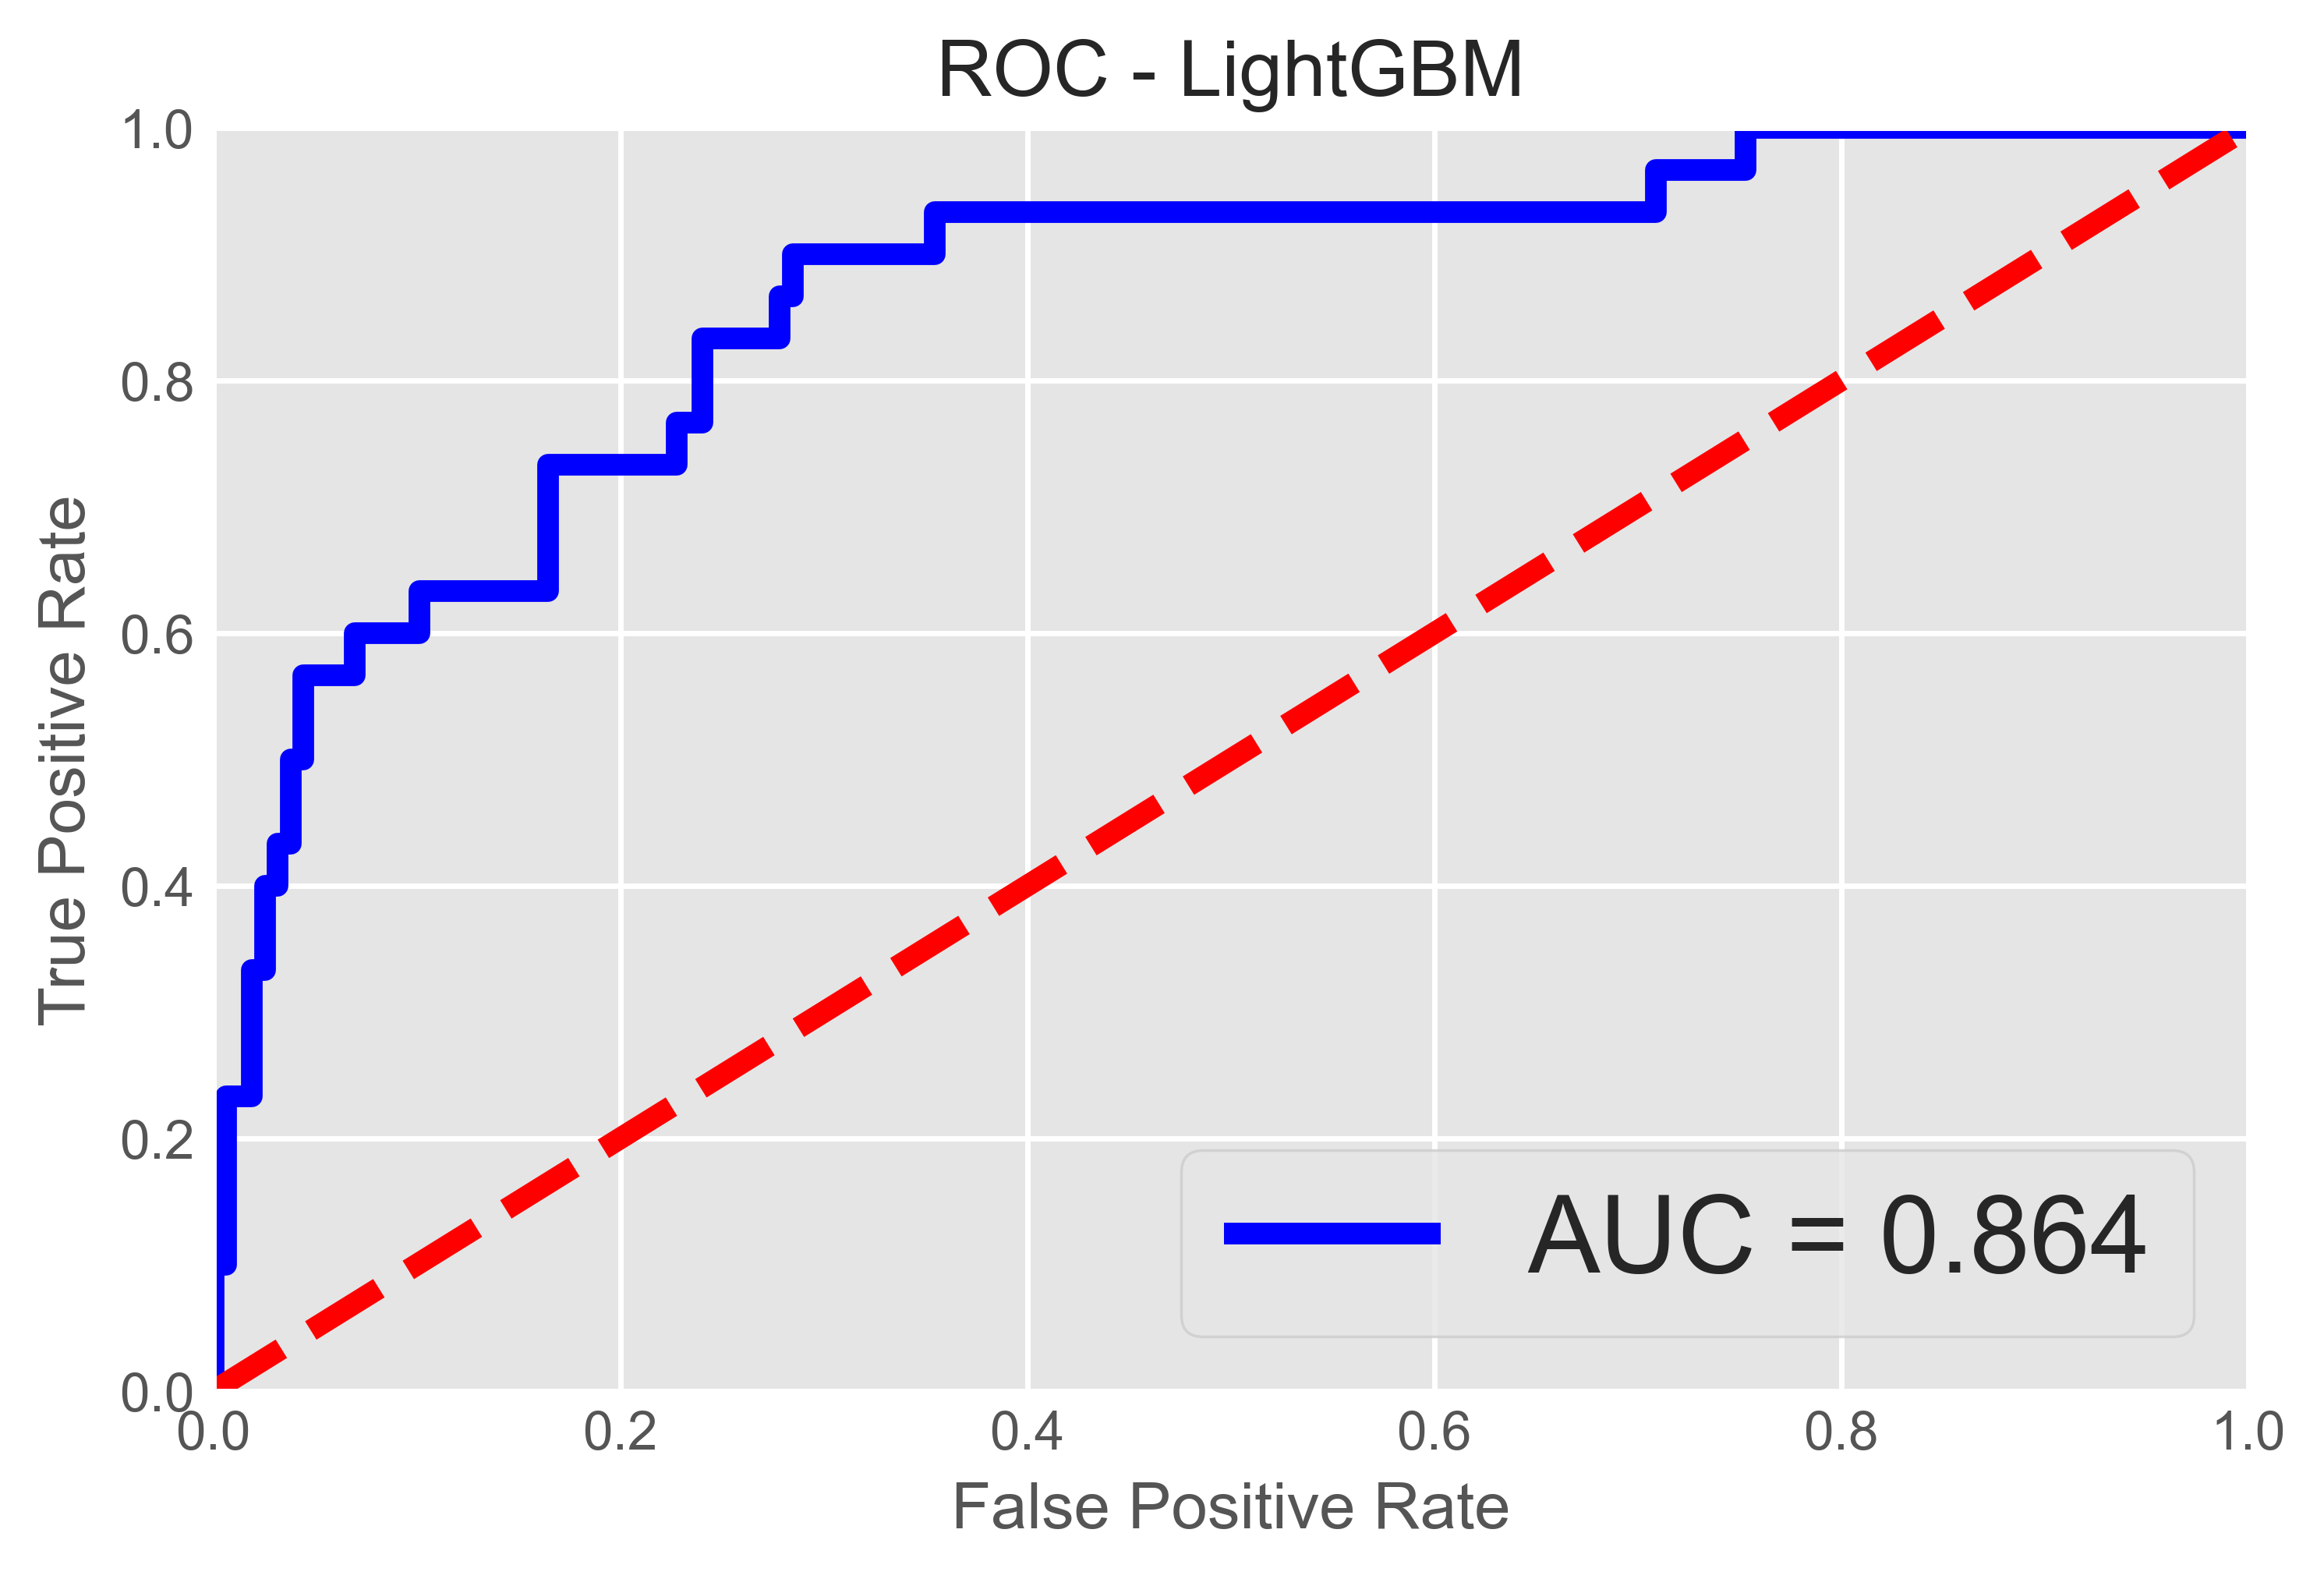

<Figure size 5000x5000 with 0 Axes>

In [72]:
fpr, tpr, threshold = roc_curve(y_val, y_pred_problgbm)
roc_auc = auc(fpr, tpr)
auc_lgbm = roc_auc_score(y_val, y_pred_problgbm)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC - LightGBM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 500
plt.style.use('ggplot')
plt.show()

# 3.4 Building Model 3: Logistic Regression

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

In [37]:
from sklearn.linear_model import LogisticRegression

In [82]:
# gloria: need help in running this portion especially
pipe_logreg = Pipeline([
         ('sampling', SMOTE()),
         ('lr', LogisticRegression(penalty='l2',random_state=42, n_jobs = -1))
     ])


params = {'lr__C' : [0.001,0.01,0.1,1,10,100,1000]} #penalty is removed, since default solver method do not support l1
                                                    # penalty

lr_grid = GridSearchCV(pipe_logreg, 
                    params,
                    scoring='roc_auc', 
                    cv=5)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('lr',
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=42))]),
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [83]:
print(lr_grid.best_params_)
lr_grid.score(X_train_val, y_train_val)

{'lr__C': 1}


0.8362291595457826

ROC_AUC:  0.867284315658059
Recall:  0.7660818713450293
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       890
           1       0.47      0.77      0.58       171

    accuracy                           0.82      1061
   macro avg       0.71      0.80      0.74      1061
weighted avg       0.87      0.82      0.84      1061



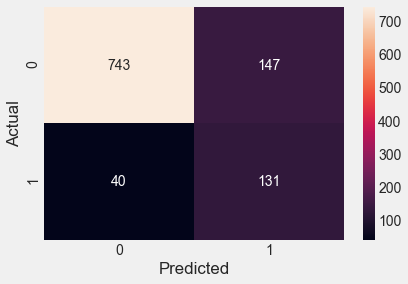

In [39]:
logreg = LogisticRegression(penalty= 'l2', C= 1, max_iter=1000) # based on results
logreg.fit(X_train, y_train)
y_pred_problr_train = logreg.predict_proba(X_train)[:, 1]
probabilitythreshold_lr = 0.2
y_pred_thresholdlr_train = (y_pred_problr_train>=probabilitythreshold_lr).astype(int)

confusion_matrix_lr = pd.crosstab(y_train, y_pred_thresholdlr_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g')

print('ROC_AUC: ',roc_auc_score(y_train, y_pred_problr_train))
print('Recall: ', recall_score(y_train,y_pred_thresholdlr_train))
print(classification_report(y_train, y_pred_thresholdlr_train))

ROC_AUC:  0.8386075949367089
Recall:  0.8
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       158
           1       0.38      0.80      0.52        30

    accuracy                           0.76       188
   macro avg       0.67      0.78      0.68       188
weighted avg       0.86      0.76      0.79       188



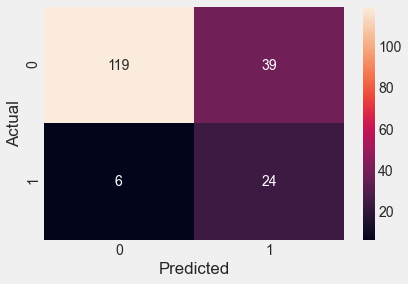

In [38]:
logreg = LogisticRegression(penalty= 'l2', C= 1, max_iter=1000) # based on results
logreg.fit(X_train, y_train)
y_pred_problr = logreg.predict_proba(X_val)[:, 1]
probabilitythreshold_lr = 0.2
y_pred_thresholdlr = (y_pred_problr>=probabilitythreshold_lr).astype(int)

confusion_matrix_lr = pd.crosstab(y_val, y_pred_thresholdlr, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g')

print('ROC_AUC: ',roc_auc_score(y_val, y_pred_problr))
print('Recall: ', recall_score(y_val,y_pred_thresholdlr))
print(classification_report(y_val, y_pred_thresholdlr))

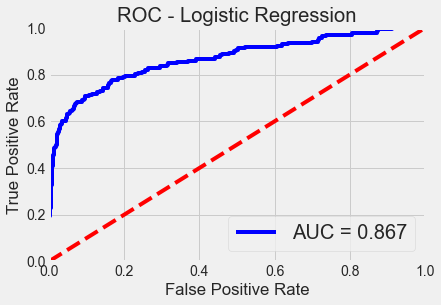

<Figure size 720x720 with 0 Axes>

In [41]:
roc_auc_score(y_train, y_pred_problr_train)

fpr, tpr, threshold = roc_curve(y_train, y_pred_problr_train)
roc_auc = auc(fpr, tpr)
auc_lr = roc_auc_score(y_train, y_pred_problr_train)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC - Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 500
plt.style.use('ggplot')
plt.show()

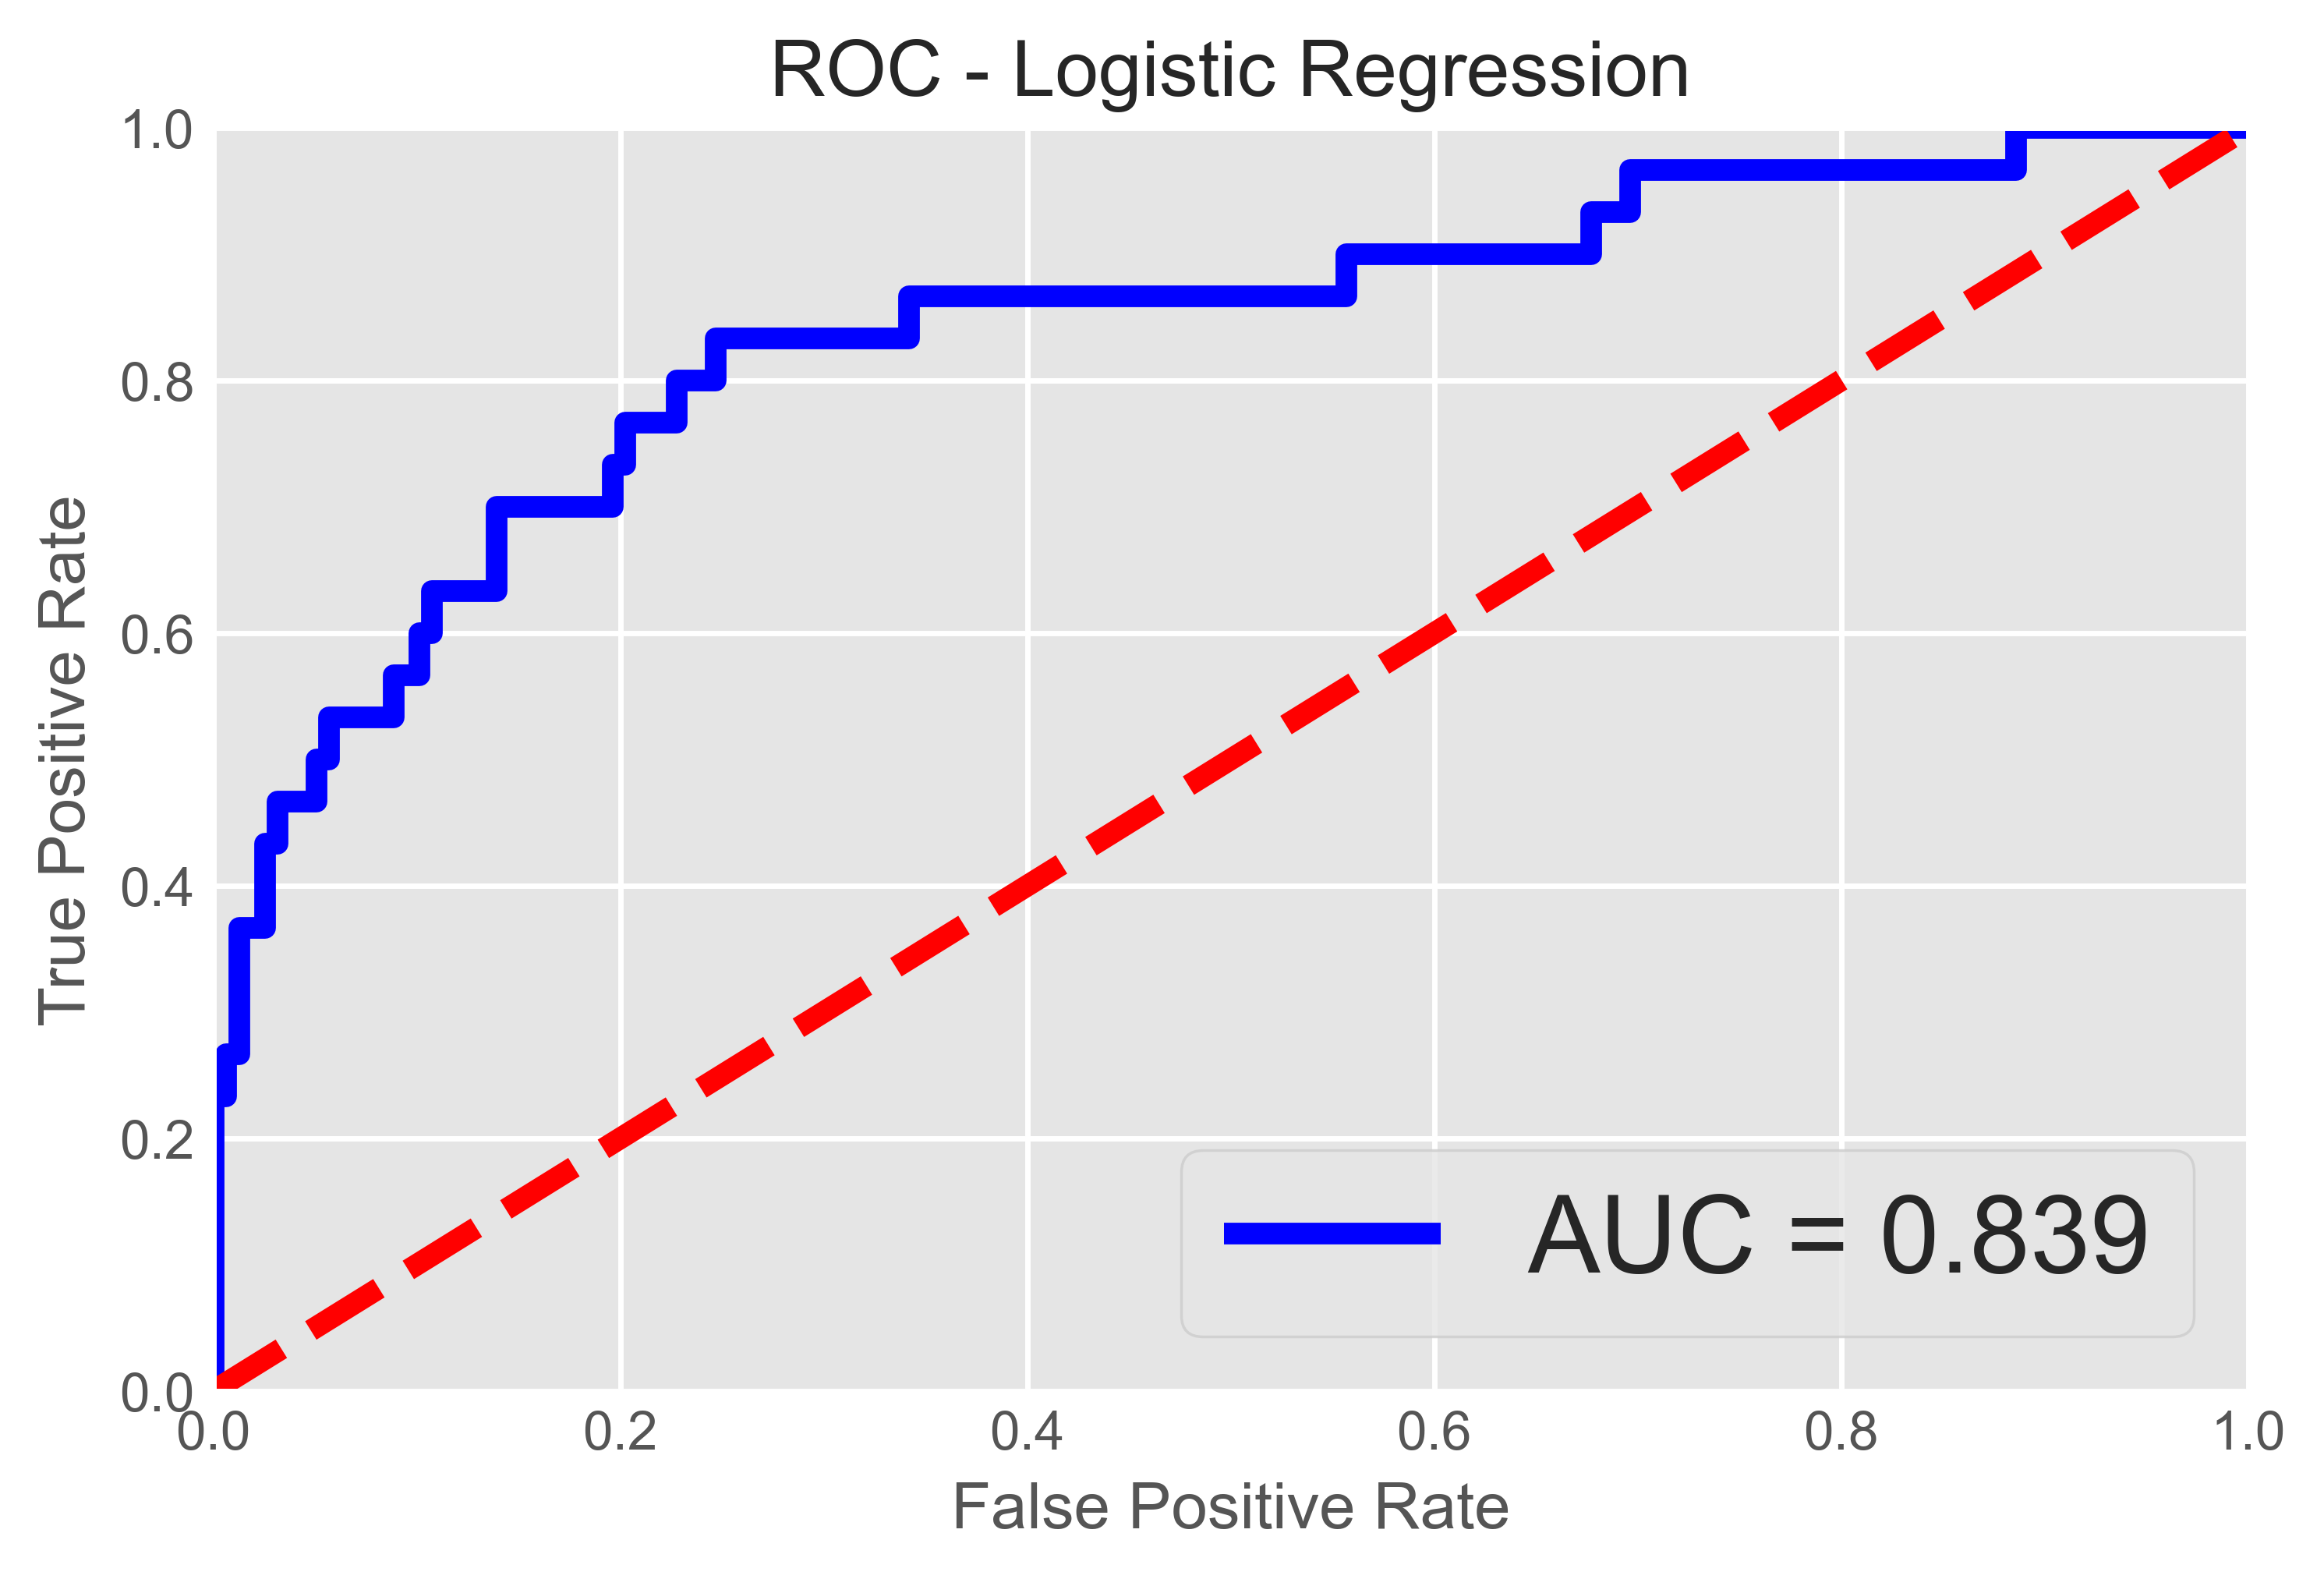

<Figure size 5000x5000 with 0 Axes>

In [89]:
fpr, tpr, threshold = roc_curve(y_val, y_pred_problr)
roc_auc = auc(fpr, tpr)
auc_lr = roc_auc_score(y_val, y_pred_problr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC - Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 500
plt.style.use('ggplot')
plt.show()

# 3.4 Building Model 4: Support Vector Machine

In [90]:
from sklearn.svm import SVC  

In [91]:
svc_pipe = Pipeline([
         ('sampling', SMOTE()),
         ('SVC', SVC())
     ])

svc_param_grid = {'SVC__C': [0.1,0.5, 1, 5, 10, 50, 100], #regularization
                  'SVC__gamma': ['scale', 'auto'],
                  'SVC__kernel': ['linear','rbf', 'poly', 'sigmoid']
                 }
# 'gaussian RBF kernel','polynomial kernel', 
# default degree 3 for polynomial kernel

In [92]:
svc_grid = GridSearchCV(svc_pipe, 
                    svc_param_grid,
                    scoring='roc_auc', 
                    cv=5)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sampling', SMOTE()), ('SVC', SVC())]),
             param_grid={'SVC__C': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [93]:
print("Best Params: {p}".format(p =svc_grid.best_params_)
     )
print("Score: ", svc_grid.score(X_train, y_train))

Best Params: {'SVC__C': 1, 'SVC__gamma': 'auto', 'SVC__kernel': 'linear'}
Score:  0.8380971154477955


ROC_AUC:  0.8394514767932489
Recall:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       158
           1       0.37      0.77      0.49        30

    accuracy                           0.75       188
   macro avg       0.65      0.76      0.66       188
weighted avg       0.85      0.75      0.78       188



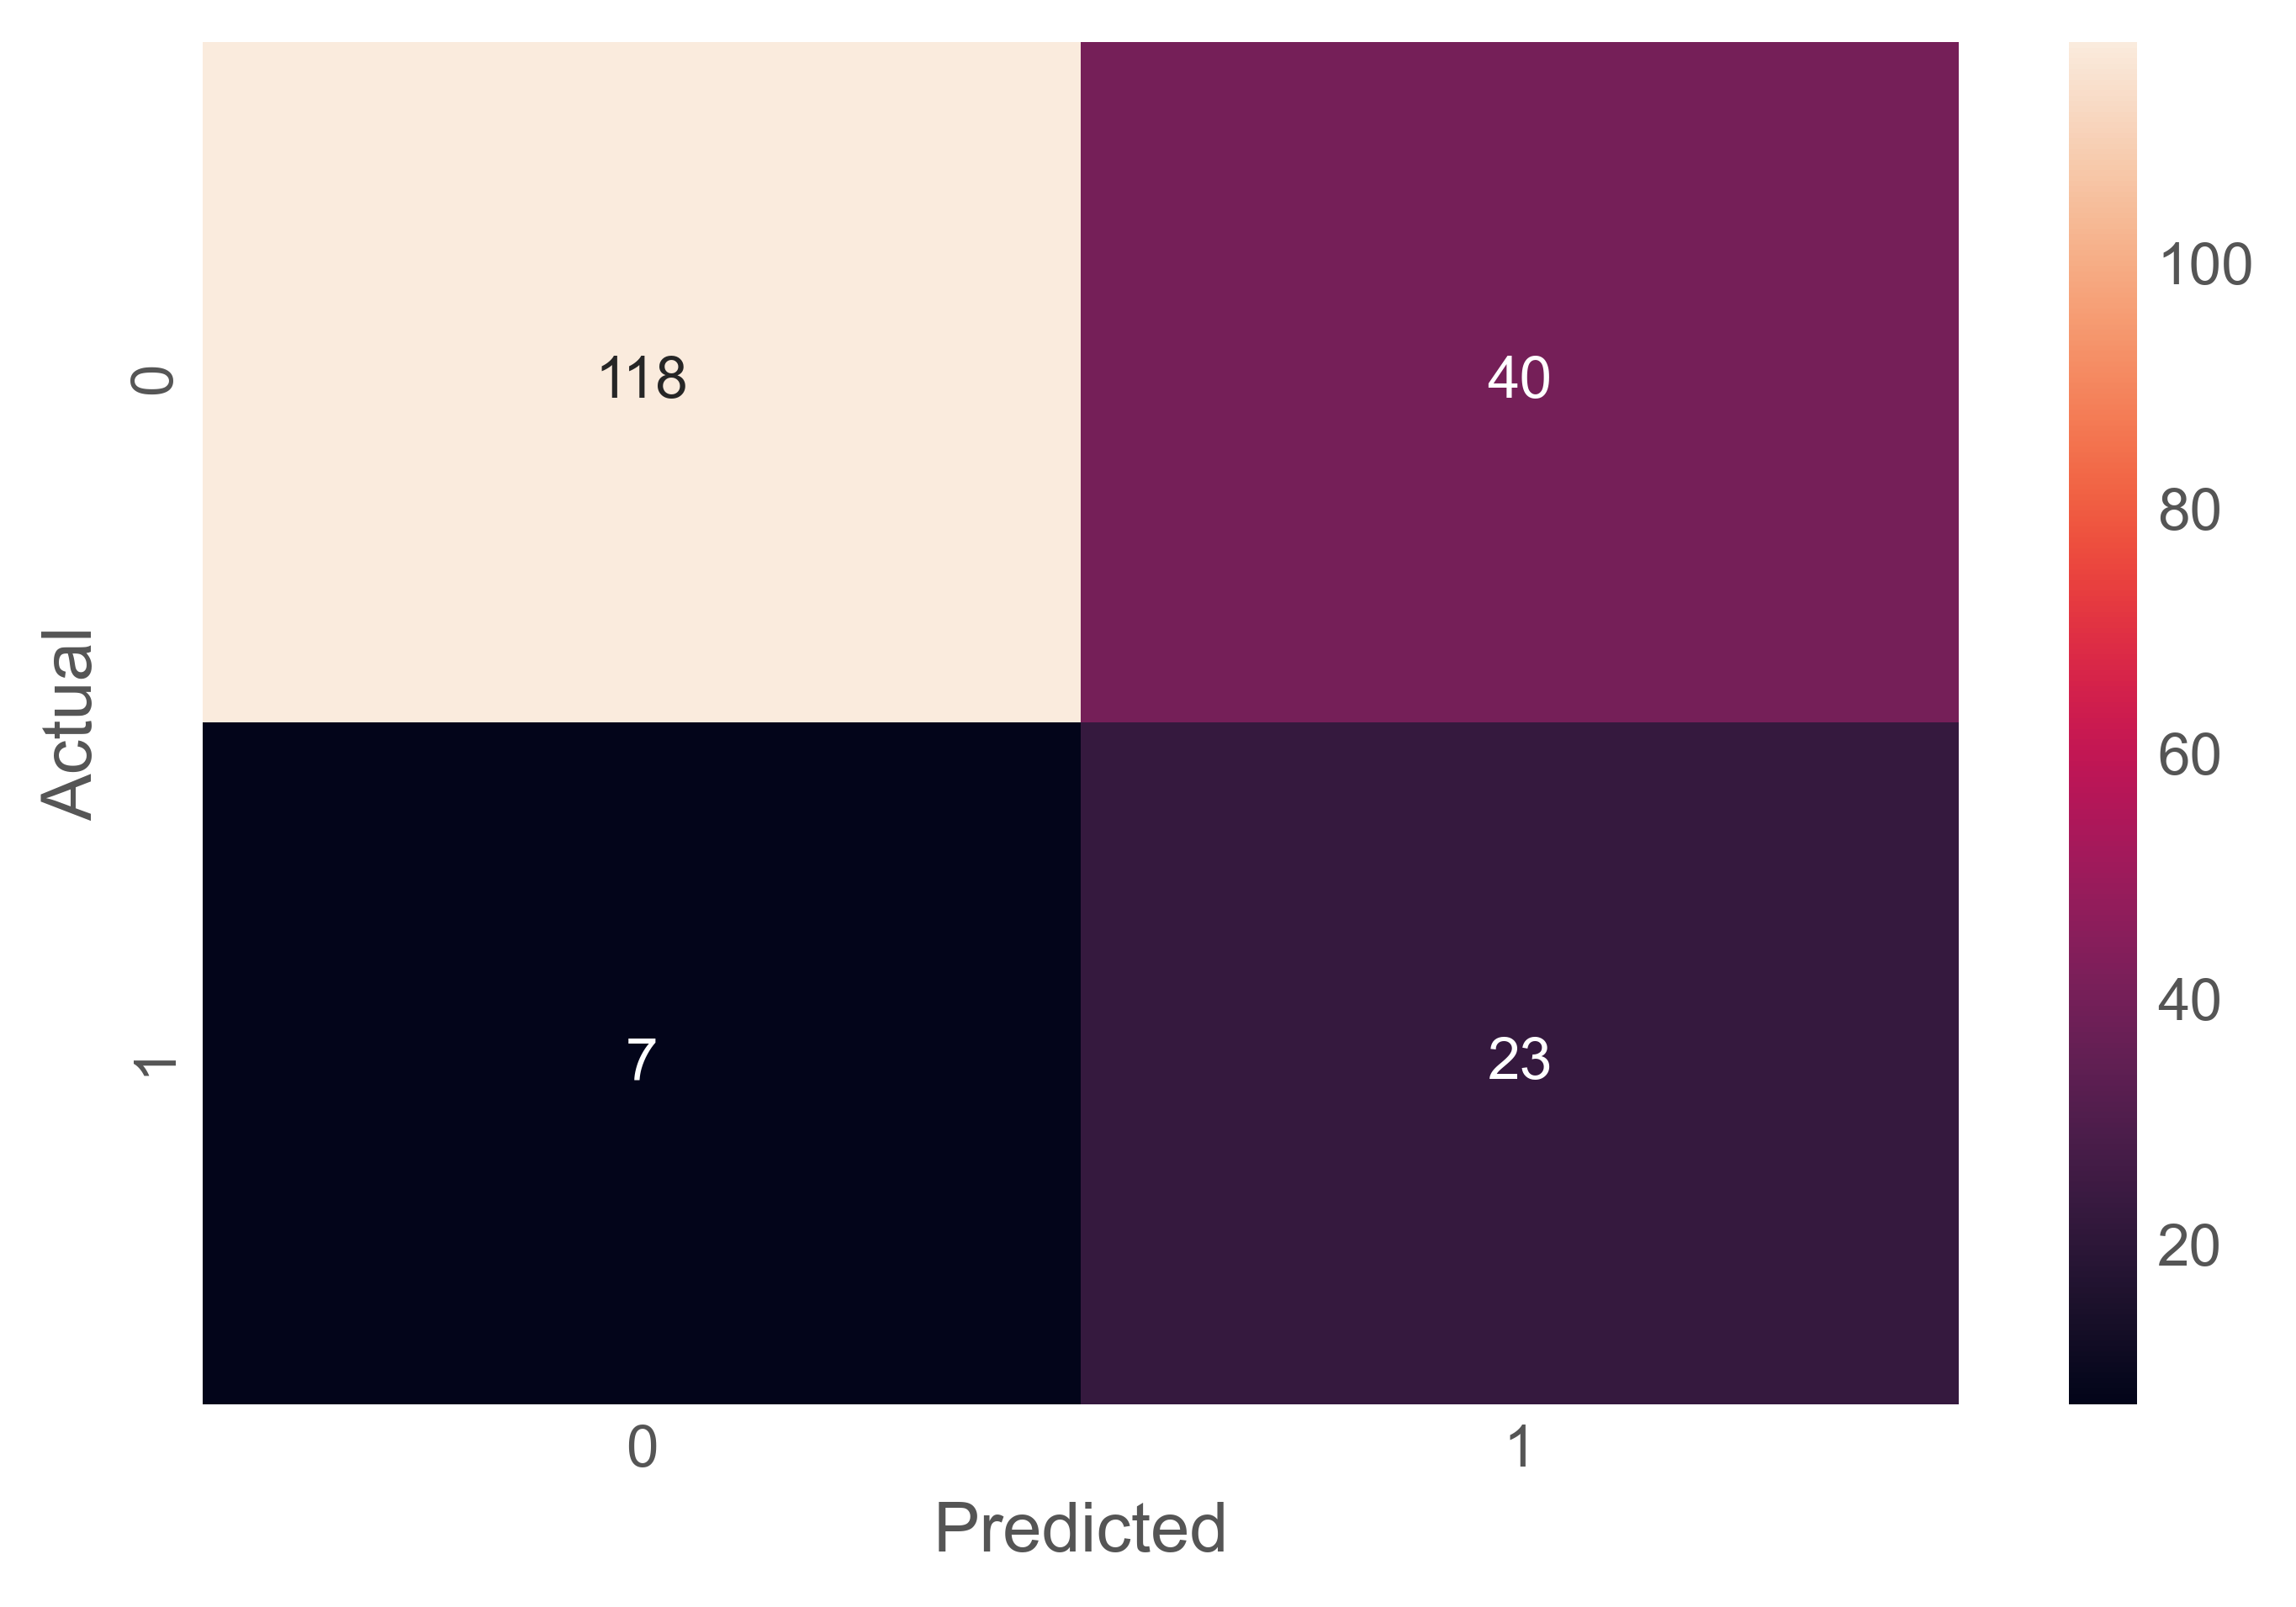

In [98]:
svc_clf = SVC(C = 1, gamma = 'auto', kernel = 'linear', probability = True)
svc_clf.fit(X_train, y_train)
y_pred_prob_svc = svc_clf.predict_proba(X_val)[:, 1]
probabilitythreshold_svc = 0.2
y_pred_threshold_svc = (y_pred_prob_svc>=probabilitythreshold_svc).astype(int)

confusion_matrix_svc = pd.crosstab(y_val, y_pred_threshold_svc, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_svc, annot=True, fmt='g')

print('ROC_AUC: ',roc_auc_score(y_val, y_pred_prob_svc))
print('Recall: ', recall_score(y_val,y_pred_threshold_svc))
print(classification_report(y_val, y_pred_threshold_svc))

## AUC-ROC

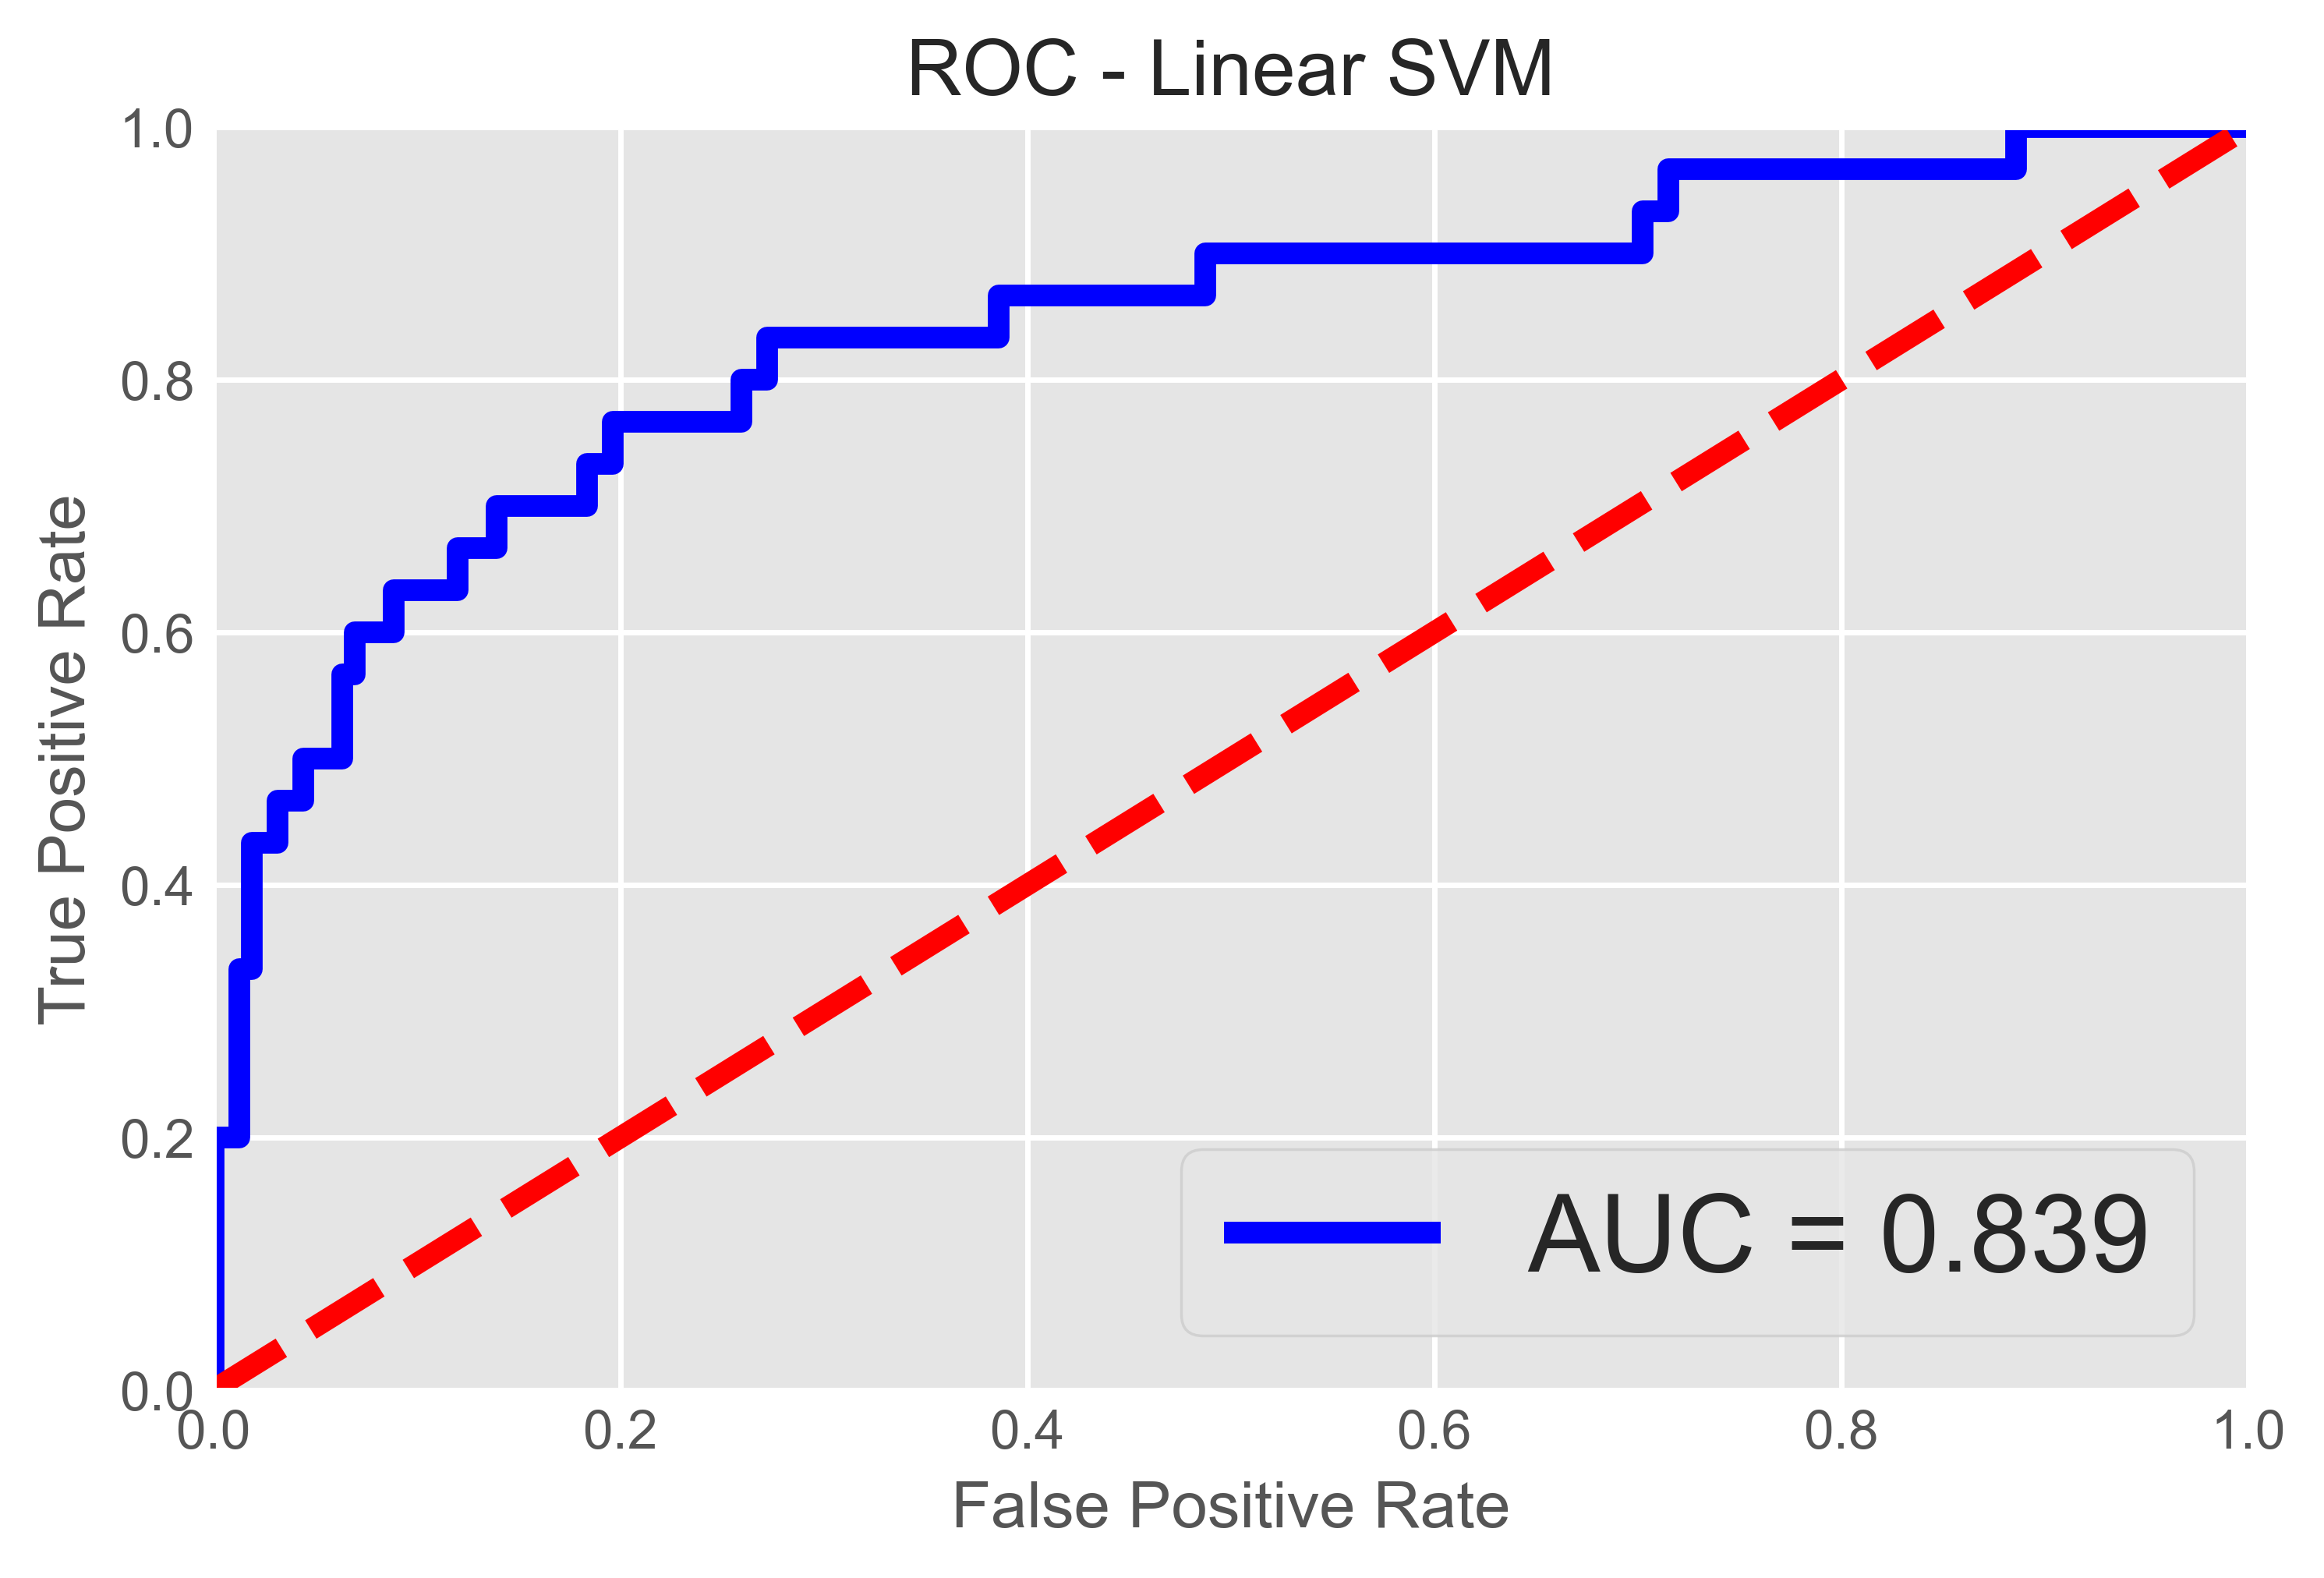

<Figure size 5000x5000 with 0 Axes>

In [100]:
fpr, tpr, threshold = roc_curve(y_val, y_pred_prob_svc)
roc_auc = auc(fpr, tpr)
auc_svc = roc_auc_score(y_val, y_pred_prob_svc)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC - Linear SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 500
plt.style.use('ggplot')
plt.show()

## Final Model and performance on Test Set

Note: Since we chose scoring = AUC as objective to maximize, we select LightGBM

**Recall**: LogReg (0.8) > SVM (0.767) > LightGBM (0.733) > RF (0.67)
<br>
**AUC**: LightGBM (0.864) > SVM (0.839) > LogReg (0.8386) > RF (0.791)

ROC_AUC:  0.8408408408408407
Recall:  0.7777777777777778
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       185
           1       0.42      0.78      0.54        36

    accuracy                           0.79       221
   macro avg       0.68      0.78      0.70       221
weighted avg       0.86      0.79      0.81       221



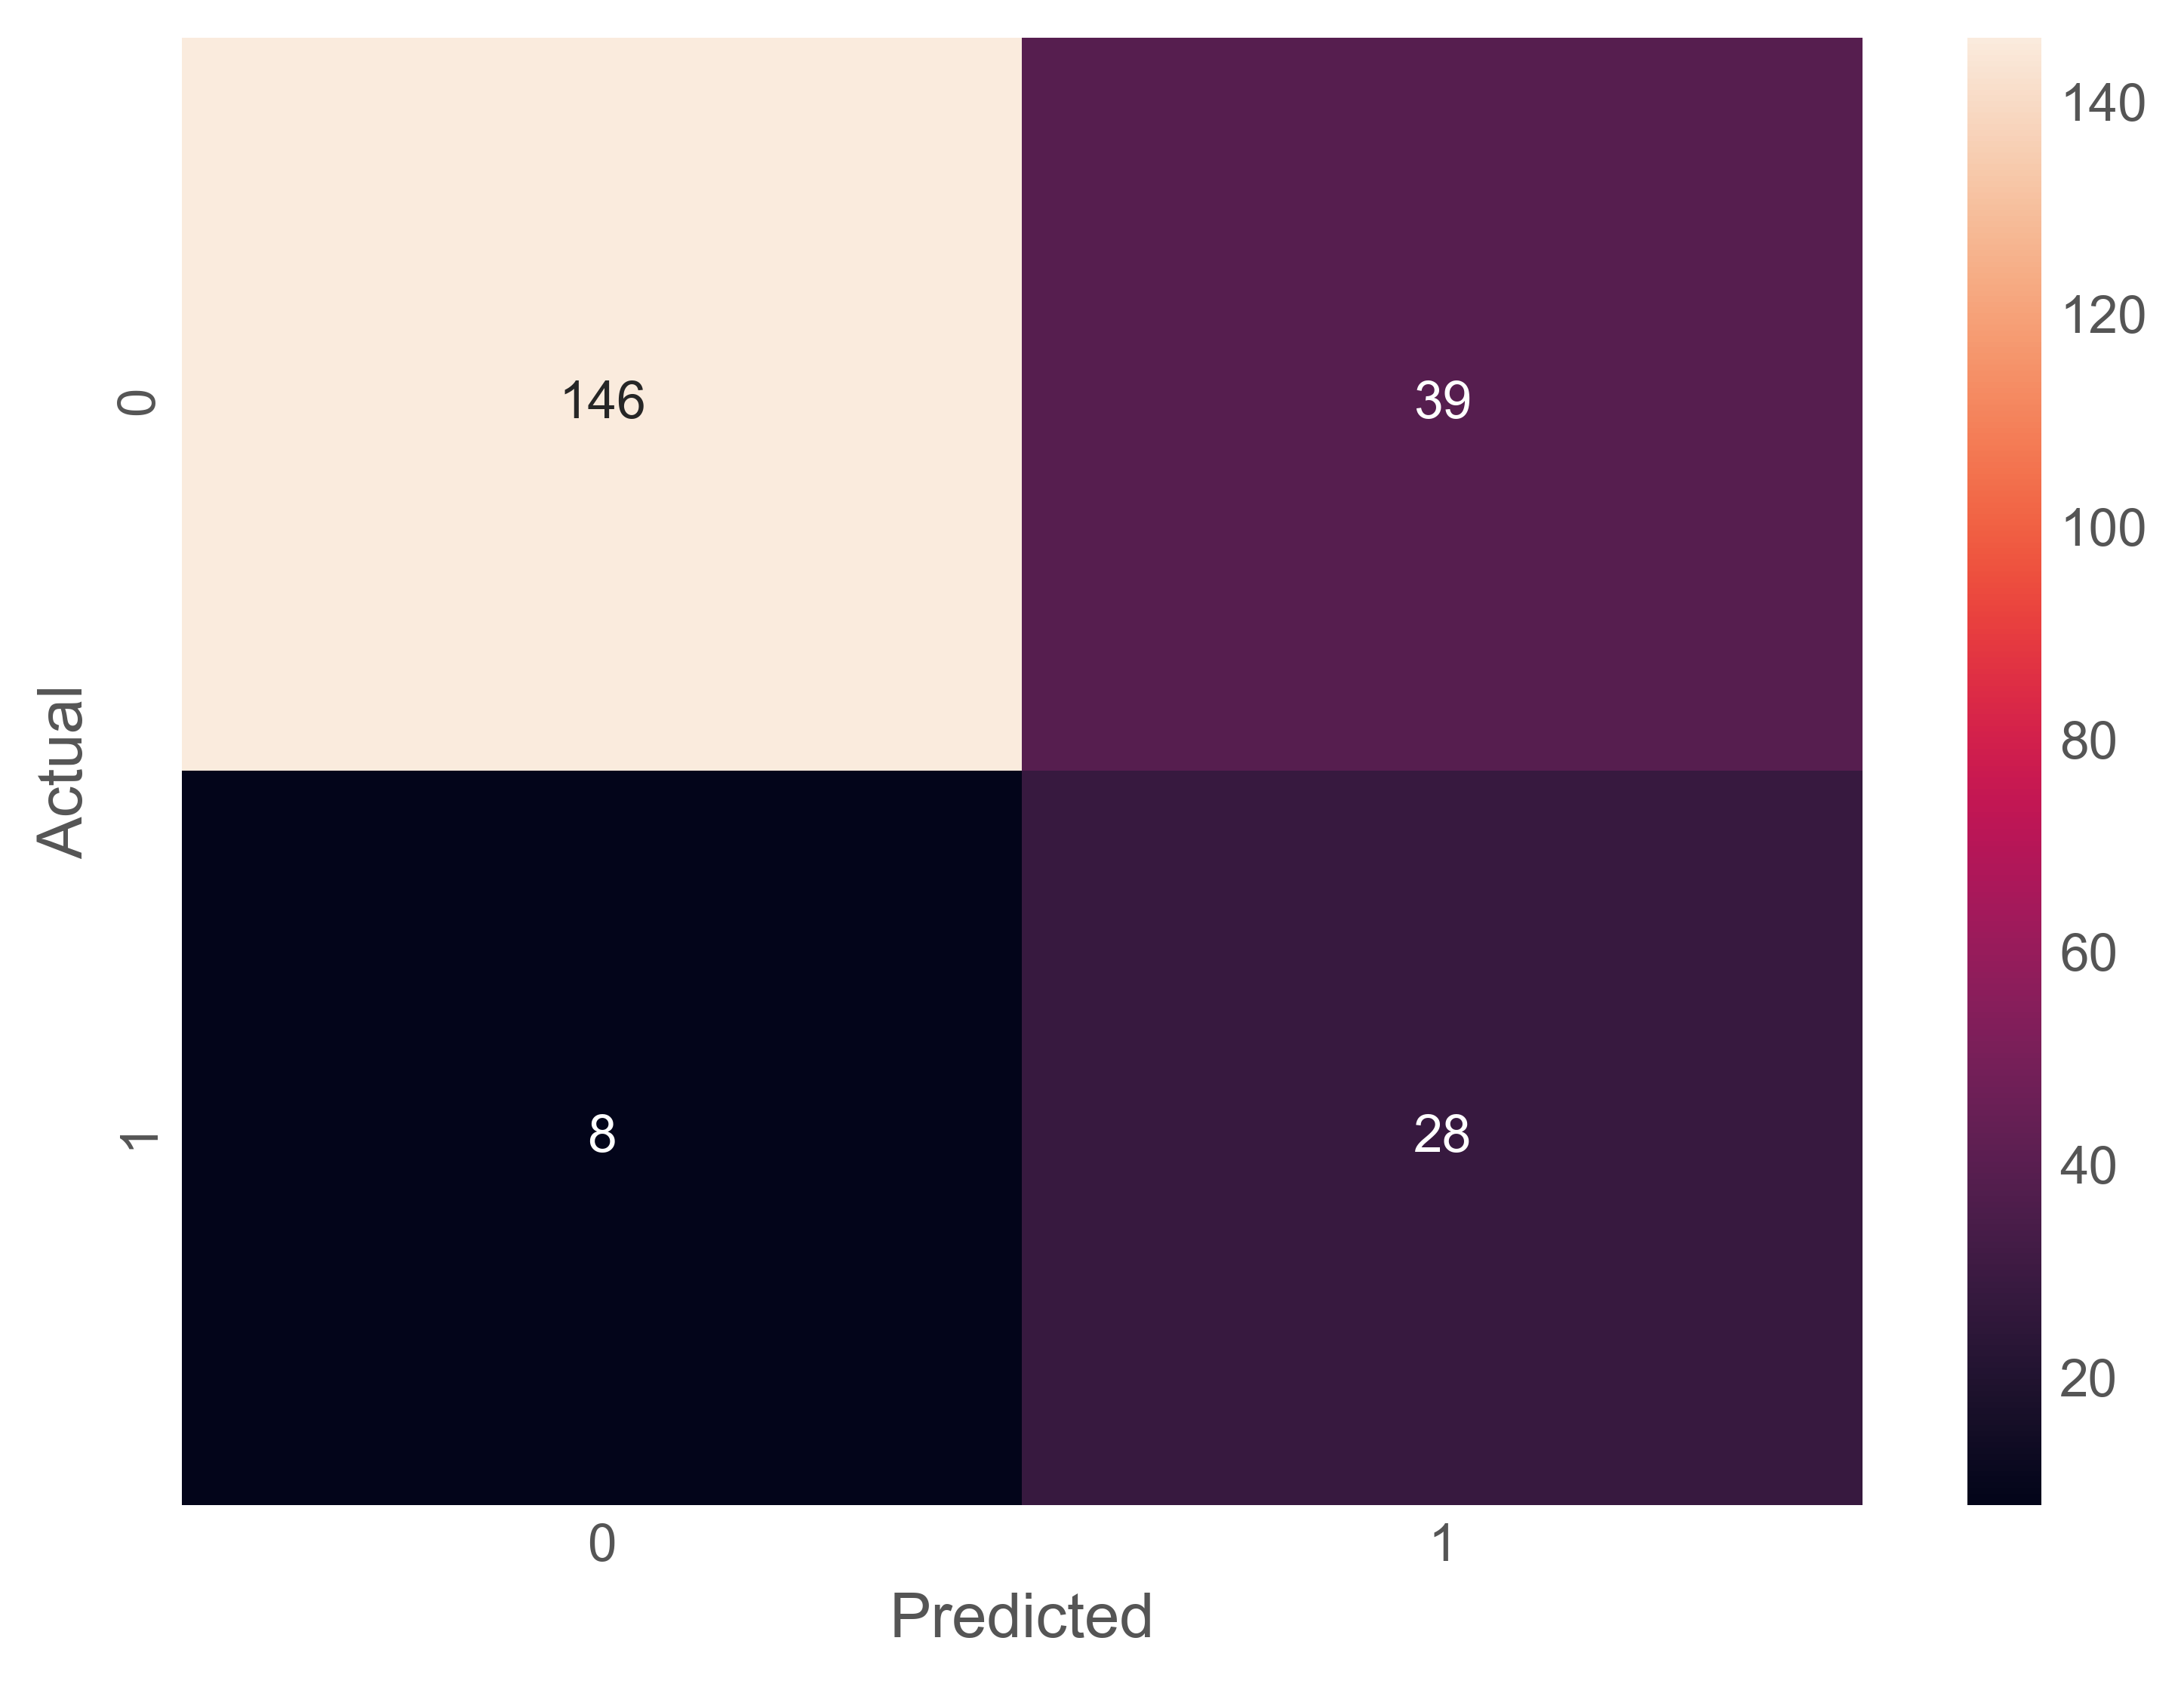

In [101]:
# Refit on training & validation set combined

lgbmCLF = lgb.LGBMClassifier(learning_rate=0.15, 
                             n_estimators=1000,
                             num_leaves=2, 
                             colsample_bytree = 0.1,
                             objective='binary')

lgbmCLF.fit(X_train_val, y_train_val)
y_pred_problgbm = lgbmCLF.predict_proba(X_test)[:, 1]
probabilitythreshold_lgbm = 0.2
y_pred_thresholdlgbm = (y_pred_problgbm>=probabilitythreshold_lgbm).astype(int)

confusion_matrix_lgbm = pd.crosstab(y_test, y_pred_thresholdlgbm, rownames=['Actual'], colnames=['Predicted'])
fig5, ax5 = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(confusion_matrix_lgbm, annot=True, fmt='g', ax = ax5)

print('ROC_AUC: ',roc_auc_score(y_test, y_pred_problgbm))
print('Recall: ', recall_score(y_test,y_pred_thresholdlgbm))
print(classification_report(y_test, y_pred_thresholdlgbm))

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_pred_problgbm)
roc_auc = auc(fpr, tpr)
auc_lgbm = roc_auc_score(y_val, y_pred_problgbm)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', prop={'size': 20})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC - LightGBM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 500
plt.style.use('ggplot')
plt.show()